# renaming the reactions according to columns and rows

In [225]:
from math import isclose
from json import load, dump

with open("WesternDietMicrobiomes/escherMap.json", "r") as jsonIn:    escherMap = load(jsonIn)

# display(escherMap)

xs, ys = [], []
for index, lst in enumerate(escherMap):
    for k, content in lst.items():
        if k != "reactions":  continue
        print(content)
        for rxn, content2 in content.items():
            if "label_x" not in content2:  print(content2) ; continue
            if not any([isclose(content2["label_x"], x, abs_tol=50) for x in xs]):   xs.append(content2["label_x"])
            if not any([isclose(content2["label_y"], y, abs_tol=50) for y in ys]):   ys.append(content2["label_y"])

print(xs, ys)

for index, lst in enumerate(escherMap):
    for k, content in lst.items():
        if k != "reactions":  continue
        for rxn, content2 in content.items():
            for x in xs:
                if isclose(content2["label_x"], x, abs_tol=50):
                    col_index = xs.index(x)
                    continue
            for y in ys:
                if isclose(content2["label_y"], y, abs_tol=50):
                    row_index = ys.index(y)
                    continue
            for attribute, val in content2.items():
                if attribute == "metabolites":
                    metabolite_dics = []
                    for metabolite in val:
                        metabolite_dic = {}
                        for cpd_index, (k2, val2) in enumerate(metabolite.items()):
                            if k2 == "bigg_id":  metabolite_dic[k2] = f"{val2}_{col_index}_{row_index}_{cpd_index}"
                            elif k2 == "coefficient":  metabolite_dic[k2] = val2
                        metabolite_dics.append(metabolite_dic)
                    escherMap[index][k][rxn][attribute] = metabolite_dics
                    print(escherMap[index][k][rxn][attribute])
                if attribute == "bigg_id":   escherMap[index][k][rxn][attribute] = f"{val}_{col_index}_{row_index}"
                # if attribute == "metabolites":
                    # escherMap[index][k][rxn][attribute] = val+
                # print(attribute, val)


with open("WesternDietMicrobiomes/escherMap_edited.json", "w") as jsonOut:    escherMap = dump(escherMap, jsonOut, indent=3)

FileNotFoundError: [Errno 2] No such file or directory: 'WesternDietMicrobiomes/escherMap.json'

# duplicating reactions across a specified number of rows and columns

In [ ]:
2961.18779884681--638.8122011531899

3600.0

In [ ]:
from json import load, dump

def duplicate_rxn(escherJSON_path, rows=None, columns=None, row_step_size=800, col_step_size=400):
    assert rows is not None or columns is not None, "What are you doing?"

    with open(escherJSON_path, "r") as jsonIn:
        escherMap = load(jsonIn)

    # display(escherMap)
    print(len(escherMap))

    print(row_step_size, col_step_size)

    for i, lst in enumerate(escherMap):
        if i == 0:  continue
        for k, content in lst.items():
            if k == "reactions":
                # row reaction development
                print("rows")
                print(row_step_size, col_step_size)
                updated_reactions = {} if "updated_reactions" not in locals() else updated_reactions
                if isinstance(rows, int):
                    row_reactions = {k:v for k,v in content.items()}
                    for row_index in range(1, rows):
                        # print(content.keys())
                        for rxnNum, content2 in content.items():
                            nextRxn = str(int(rxnNum)+1)
                            ## define the content of this reaction
                            new_content = {k:v for k,v in content2.items()}
                            ## translate the label
                            new_content["label_y"] += row_step_size*row_index
                            ## rename the reaction according to its new translation
                            rxnName_content = new_content["bigg_id"].split("_")
                            colNum, rowNum = rxnName_content[1], rxnName_content[2]
                            new_content["bigg_id"] = f"{rxnName_content[0]}_{colNum}_{str(int(rowNum)+1)}"
                            ## rename the metabolites
                            for index, metabolite in enumerate(new_content["metabolites"]):
                                ### rename the metabolites
                                ID_content = metabolite["bigg_id"].split("_")
                                metabolite["bigg_id"] = f"{ID_content[0]}_{colNum}_{rowNum}_{index}"
                            ## update the metabolite nodes
                            display(new_content.keys())
                            ## update the edge segments
                            for num, content3 in new_content["segments"].items():
                                dictionary_values = [value for value in content3.values() if isinstance(value, dict)]
                                # print(dictionary_values)
                                # for obj, value in content3.items():
                                #     # print(list(map(len, [new_content, content3])))
                                #     if isinstance(value, dict):
                                #         print(rxnNum, num, obj, value) ;  new_content["segments"][num][obj]["y"] += row_step_size*row_index
                                #     if isinstance(value, dict):
                                #         print(new_content["segments"][num][obj])
                            row_reactions[str(int(rxnNum)+row_index)] = new_content
                            # print(row_reactions[str(int(rxn)+row_index)]["segments"]["312"]["b2"])
                        updated_reactions.update({k:v for k,v in row_reactions.items()})
                escherMap[i][k] = updated_reactions  
            elif k == "nodes":
                # row metabolite development
                print("rows")
                print(row_step_size, col_step_size)
                updated_reactions = {} if "updated_reactions" not in locals() else updated_reactions
                if isinstance(rows, int):
                    row_nodes = {k:v for k,v in content.items()}
                    for row_index in range(1, rows):
                        print(content.keys())
                        # updated_reactions = {} if "updated_reactions" not in locals() else updated_reactions
                        new_mets = {}
                        for metNum, content2 in row_nodes.items():
                            ### rename the node for this set of reactions
                            # print(metNum)
                            new_mets[f"{nextRxn}{metNum}"] = content2
                            ### translating the node locations
                            if new_mets[f"{nextRxn}{metNum}"]["node_type"] in ["multimarker", "midmarker"]:
                                new_mets[f"{nextRxn}{metNum}"]["y"] += row_step_size*row_index
                            elif new_mets[f"{nextRxn}{metNum}"]["node_type"] == "metabolite":
                                new_mets[f"{nextRxn}{metNum}"]["y"] += row_step_size*row_index
                                new_mets[f"{nextRxn}{metNum}"]["label_y"] += row_step_size*row_index
                        updated_reactions.update({k:v for k,v in row_reactions.items()})
                escherMap[i][k] = updated_reactions  
            # else:   print(k)
        # if index == len(escherMap)-1:  break
        # print("columns")
        # print(row_step_size, col_step_size)
        # if isinstance(columns, int):
        #     reactions = content if rows is not None else updated_reactions
        #     col_reactions = {}
        #     for col_index in range(columns):
        #         for rxnNum, content2 in reactions.items():
        #             new_content = {k:v for k,v in content2.items()}
        #             new_content["label_x"] += col_step_size*col_index
        #             for num, content3 in new_content["segments"].items():
        #                 for obj, value in content3.items():
        #                     if isinstance(value, dict):  print(rxnNum, num, obj, value) ; new_content["segments"][num][obj]["x"] += col_step_size*col_index
        #                     if isinstance(value, dict):  print(new_content["segments"][num][obj])
        #             col_reactions[str(int(rxnNum)+col_index)] = new_content
        #         updated_reactions.update({k:v for k,v in row_reactions.items()})

        #     escherMap[index][k] = updated_reactions    

    with open(escherJSON_path.replace(".json", "_edited.json"), "w") as jsonOut:  dump(escherMap, jsonOut, indent=3)

duplicate_rxn("oneRXN_localized2.json", rows=3, columns=None)

2
800 400
rows
800 400


dict_keys(['name', 'bigg_id', 'reversibility', 'label_x', 'label_y', 'gene_reaction_rule', 'genes', 'metabolites', 'segments'])

dict_keys(['name', 'bigg_id', 'reversibility', 'label_x', 'label_y', 'gene_reaction_rule', 'genes', 'metabolites', 'segments'])

rows
800 400
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])


In [ ]:
print(1596.7619819523752-396.7619819523753)
print(2796.761981952375-1596.7619819523752)

1200.0
1200.0


In [ ]:
from json import load, dump

path = "oneRXN_localized_double.json"

with open(path, "r") as jsonIn:
    escherMap = load(jsonIn)

with open(path, "w") as jsonOut:
    dump(escherMap, jsonOut, indent=3)

## update the coordinates of an existing two-reaction map

In [ ]:
from json import load

with open("twoRXN_localized.json", 'r') as jsonIn:
    EscherMap = load(jsonIn)

row_step_size, col_step_size = 800, 400
column = 0

new_EscherMap = {}
for i, ele in enumerate(EscherMap):
    if i == 0:
        new_EscherMap[i] = ele
    new_EscherMap[i] = {}
    for k, content in ele.items():
        # print(k)
        if k == "reactions":
            new_EscherMap[i]["reactions"] = {}
            for rxnNum, content2 in content.items():
                if rxnNum == 0:
                    new_EscherMap[i]["reactions"][rxnNum] = content2
                    continue
                for k2, val in content2.items():
                    if k == "bigg_id":
                        baseRXN = val.split("_")[0]
                        new_EscherMap[i]["reactions"][rxnNum][k2] = f"{baseRXN}_{column}_{rxnNum}"
                    elif k == "label_x":
                        new_EscherMap[i]["reactions"][rxnNum][k2] = val + column*col_step_size
                    elif k == "label_y":
                        new_EscherMap[i]["reactions"][rxnNum][k2] = val + rxnNum*row_step_size
                    elif k2 == "metabolites":
                        new_mets = []
                        for cpdNum, cpd in enumerate(val):
                            cpd["bigg_id"] = f"cpd_{column}_{rxnNum}_{cpdNum}"
                            new_mets.append(cpd)
                        new_EscherMap[i]["reactions"][rxnNum][k2] = new_mets
                    elif k2 == "segments":
                        for segNum, content3 in val.items():
                            if isinstance(content3["b1"], dict):
                                new_EscherMap[i]["reactions"][rxnNum][k2][segNum][]
                    


                display(content2)
                break

        elif k == "nodes":
            pass
        elif k == "text_labels":
            pass
        elif k == "canvas":
            pass

{'name': 'diphosphate phosphohydrolase',
 'bigg_id': 'rxn00001_0_0',
 'reversibility': False,
 'label_x': -682.8153489006918,
 'label_y': 228.44559706520863,
 'gene_reaction_rule': '',
 'genes': [],
 'metabolites': [{'bigg_id': 'cpd_0_0_0', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_1', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_2', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_3', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_4', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_5', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_6', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_7', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_8', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_9', 'coefficient': -1},
  {'bigg_id': 'cpd_0_0_10', 'coefficient': 1},
  {'bigg_id': 'cpd_0_0_11', 'coefficient': 1},
  {'bigg_id': 'cpd_0_0_12', 'coefficient': 1},
  {'bigg_id': 'cpd_0_0_13', 'coefficient': 1},
  {'bigg_id': 'cpd_0_0_14', 'coefficient': 1},
  {'bigg_id': 'cpd_0_0_15', 'coefficient': 1},
  {'bigg_id': 'cpd_0_0_16', 'coeff

# process the ASVMetaboliteInteractions community interactions

## remove select compounds from the model Figure

In [83]:
from cobra.io import save_json_model, load_json_model
# from cobra import Reaction
from json import dump
from pandas import read_csv
from numpy import array, load


all_specifiedAAs = dict(load("../../CommScores/commscores/data/categories/all_specifiedAAs.npy"))
blacklistedIDs = {"cpd00001": "H2O", "cpd00011": "CO2", "cpd00067": "H+"}
blacklistedIDs.update(all_specifiedAAs)

effectiveASV_model = load_json_model("ASVInteractionModel-NoFit.json")
for rxn in effectiveASV_model.reactions:
    metabolites = {}
    print(rxn.id)
    break
    # newRXN = Reaction()
    # newRXN.id = rxn.id
    # newRXN.name = rxn.name
    for met, flux in rxn.metabolites.items():
        if abs(flux) < 0.01:   continue
        if met.id in blacklistedIDs:  continue
        metabolites[met] = flux
    rxn.add_metabolites({met: -coeff for met, coeff in rxn.metabolites.items()})
    rxn.add_metabolites(metabolites)
    # rxn.id = 
    # display(rxn.metabolites, metabolites)
    
save_json_model(effectiveASV_model, "ASVInteractionModel-NoFit_filtered.json")

Lactobacillus.3RC-ABX_-1.5


In [81]:
model = load_json_model("ASVInteractionModel-NoFit_filtered.json")
for index, rxn in enumerate(model.reactions):
    if index < 3:
        display(rxn.metabolites)
        continue
    break

{<Metabolite cpd00029 at 0x7f4fe759f7d0>: 0.9204819525016532,
 <Metabolite cpd00064 at 0x7f4fdd6a42d0>: -0.0240021086132065,
 <Metabolite cpd00119 at 0x7f4fe2a4c910>: -0.010170385005596,
 <Metabolite cpd00214 at 0x7f4fe2a4de50>: -0.0257992028285166}

{<Metabolite cpd00029 at 0x7f4fe759f7d0>: 5.414967913747346,
 <Metabolite cpd00064 at 0x7f4fdd6a42d0>: -0.0970760877338672,
 <Metabolite cpd00076 at 0x7f4fe2a2aad0>: -1.6561986955355965,
 <Metabolite cpd00119 at 0x7f4fe2a4c910>: -0.0411339354804522,
 <Metabolite cpd00122 at 0x7f4fe759d950>: -0.2770460880248249,
 <Metabolite cpd00214 at 0x7f4fe2a4de50>: -0.1043444023025079}

{<Metabolite cpd00029 at 0x7f4fe759f7d0>: 10.490988390455676,
 <Metabolite cpd00064 at 0x7f4fdd6a42d0>: -0.2695924793800049,
 <Metabolite cpd00076 at 0x7f4fe2a2aad0>: -2.676326580308355,
 <Metabolite cpd00119 at 0x7f4fe2a4c910>: -0.1067719238572555,
 <Metabolite cpd00122 at 0x7f4fe759d950>: 2.5417740718652,
 <Metabolite cpd00158 at 0x7f4fe759e810>: -0.2872097148390206,
 <Metabolite cpd00214 at 0x7f4fe2a4de50>: -0.2708482047108934,
 <Metabolite cpd00382 at 0x7f4fe2a2b750>: -0.0634118528841076,
 <Metabolite cpd03198 at 0x7f4fe2f8ae50>: -0.0583024320798142}

## combining existing Escher maps

In [2]:
import sys
sys.path.insert(0, "/home/afreiburger/env_packages/lib/python3.11/site-packages")

from os import system
import sys
# print(system("path"))
display(sys.path)

['/home/afreiburger/env_packages/lib/python3.11/site-packages',
 '/scratch/shared/code/MicrobiomeNotebooks/WesternDietMicrobiomes',
 '/usr/local/lib/python311.zip',
 '/usr/local/lib/python3.11',
 '/usr/local/lib/python3.11/lib-dynload',
 '',
 '/home/afreiburger/.local/lib/python3.11/site-packages',
 '/usr/local/lib/python3.11/site-packages']

In [4]:
from modelseedpy_escher.core import EscherMap
from modelseedpy_escher.escher_map_grid import EscherGrid

WD = EscherMap.from_json("new_map.json")
RC = EscherMap.from_json("RC-Map.json")
grid = EscherGrid()
map_merge = grid.build([WD, RC], (1, 2))

import json
with open('map_merge.json', 'w') as fh:
    fh.write(json.dumps(map_merge.escher_data))

## parse the stoichiometric relationships

In [10]:
from pandas import read_csv
from json import dump

interactions = read_csv("ASVMetaboliteInteractions-NoFit.csv").set_index("ASV")
stoich_mapping = {}
for index, row in interactions.iterrows():
    stoich_mapping[index] = {"reactants":{}, "products":{}}
    for col, ele in row.items():
        metID = col.split("_")[0]
        if ele > 0:   stoich_mapping[index]["products"][metID] = ele
        elif ele < 0:   stoich_mapping[index]["reactants"][metID] = ele

# display(stoich_mapping)
with open("ASV_metabolic_activity_stoich.json", 'w') as jsonOut:
    dump(stoich_mapping, jsonOut, indent=3)

# parse the model for content and interactions

In [92]:
from cobra.io import load_json_model
from json import load

# from optlang import Objective

effectiveASV_model = load_json_model("ASVInteractionModel-NoFit.json")
rxnNames = [rxn.id for rxn in effectiveASV_model.reactions]
rcNames = {}
numRCs = []
for name in rxnNames:
    if "RC" in name:
        nameParts = name.split("RC")
        numRCs.append(nameParts[0])
        rcNames[nameParts[0]] = rcNames.get(nameParts[0], [])
        rcNames[nameParts[0]].append(nameParts[1].split("_")[1])
# print(set(rcNames.keys()) - set(numRCs))
wdNames = {}
numWDs = []
for name in rxnNames:
    if "WD" in name:
        nameParts = name.split("WD")
        numWDs.append(nameParts[0])
        wdNames[nameParts[0]] = wdNames.get(nameParts[0], [])
        wdNames[nameParts[0]].append(nameParts[1].split("_")[1])
# print(set(wdNames.keys()) - set(numWDs))
new_rcNames = [f"{k}RC-ABX_{time}" for k,v in rcNames.items() for time in v]
new_wdNames = [f"{k}WD-ABX_{time}" for k,v in wdNames.items() for time in v]

missing_keys = set(rxnNames) - set(new_rcNames+new_wdNames)
# print(missing_keys)

def search_days(day):
    RCasvs = [asv for asv, days in rcNames.items() if day in days]
    WDasvs = [asv for asv, days in wdNames.items() if day in days]
    display("RC", sorted(RCasvs))
    display("WD", sorted(WDasvs))

def biggest_engager(day, diet, compound, all=False, limit=1):
    print(compound)
    if all:
        for rxn in effectiveASV_model.reactions:
            if day in rxn.id and diet in rxn.id:
                for met, coef in rxn.metabolites.items():
                    # print(met.name, coef)
                    if compound == met.name and coef > limit:
                        print(rxn.name)

    maxFlux = [None, 0]
    minFlux = [None, 0]
    for rxn in effectiveASV_model.reactions:
        if day in rxn.id and diet in rxn.id:
            for met, coef in rxn.metabolites.items():
                # print(met.name, coef)
                if compound == met.name:
                    if coef > maxFlux[1]:    maxFlux = [rxn.name, coef]
                    elif coef < minFlux[1]:  minFlux = [rxn.name, coef]
    if maxFlux != [None, 0]:  print("maxFlux", maxFlux)
    if minFlux != [None, 0]:  print("minFlux", minFlux)

def full_assessment(day, diet, compounds, engagers=True, classification=True, skipping_mets=None):
    print(f"metabolite assessment for {day} on the {diet} diet")
    #determine the biggest consumers/producers of each compound
    if engagers:
        for category, metabolites in compounds.items():
            print(category)
            biggest_engager(day, diet, metabolites)

    #determine the compounds that exclusively consumed/produced or both
    if classification:
        metabolites = {"consumed": set(), "produced": set(), "intermediates": set()}
        for rxn in effectiveASV_model.reactions:
            if "_"+day in rxn.id and diet in rxn.id:
                for met, coef in rxn.metabolites.items():
                    if skipping_mets and met.name in skipping_mets:  continue
                    if abs(coef) <= 0.05:   continue
                    # print(met.name, coef)
                    if coef > 0:
                        metabolites["produced"].add(met.name)
                        if met.name in metabolites["consumed"]:
                            # print("produced", met.name, rxn.name)
                            metabolites["intermediates"].add(met.name)
                    elif coef < 0:
                        metabolites["consumed"].add(met.name)
                        # print("consumed", met.name, rxn.name)
                        if met.name in metabolites["produced"]:
                            # print("consumed", met.name, rxn.name)
                            metabolites["intermediates"].add(met.name)
        metabolites["consumed"] -= metabolites["intermediates"]
        metabolites["produced"] -= metabolites["intermediates"]
        display(metabolites)




def count_interactions(compounds):
    from itertools import product
    days, diets = ["-1.5", "1.5", "4.0", "6.0", "9.0", "12.5"], ["RC", "WD"]
    Interactions = {category:dict() for category in compounds}
    categories = {ele:k for k,v in compounds.items() for ele in v}
    for day, diet in product(days, diets):
        for category in Interactions:
            if day in Interactions[category]:  Interactions[category][day].update({diet:set()})
            else:                    Interactions[category][day] = {diet:set()}
    for category, content in Interactions.items():
        for day, dietInfo in content.items():
            for diet, mets in dietInfo.items():
                produced, consumed = set(), set()
                # print(category, day, diet)
                for rxn in effectiveASV_model.reactions:
                    if "_"+day not in rxn.id or diet not in rxn.id:  continue
                    for met, coef in rxn.metabolites.items():
                        if category != categories[met.name]:   continue
                        if coef > 0:
                            produced.add(met.name)
                            if met.name in consumed:
                                # print("produced", met.name, rxn.name)
                                mets.add(met.name)
                                # print("yes")
                        elif coef < 0:
                            consumed.add(met.name)
                            # print("consumed", met.name, rxn.name)
                            if met.name in produced:
                                # print("consumed", met.name, rxn.name)
                                mets.add(met.name)
                                # print("yes")
                # display(produced, consumed)

    # print(aaInteractionsa)
    InteractionCounts = {}
    for category, content in Interactions.items():
        InteractionCounts[category] = {}
        for day, dietInfo in content.items():
            # print(day, InteractionCounts[category])?
            InteractionCounts[category][day] = InteractionCounts[category].get(day, {})
            for diet, mets in dietInfo.items():
                print(category, day, diet, mets)
                InteractionCounts[category][day][diet] = len(mets)
                # print(day, diet, len(mets)), mets)
    display(InteractionCounts)

    # convert the amino acid counts into a DataFrame
    from pandas import DataFrame
    df = DataFrame(InteractionCounts)
    df.index.name = "Interval Day"
    display(df)
    df.to_csv("InteractionCounts.csv")
    return df


def ASVconnectedness(model):
    days, diets = ["-1.5", "1.5", "4.0", "6.0", "9.0", "12.5"], ["RC", "WD"]
    connectedness, errors, averages = {}, {}, {}
    for day in days:
        connectedness[day], errors[day], averages[day] = {}, {}, {}
        for diet in diets:
            connectedness[day][diet] = {}
            for rxn in model.reactions:
                if "_"+day not in rxn.id or diet not in rxn.id:  continue
                rxnID = rxn.id.replace("_"+day, '').replace(diet, '').replace("-ABX", '')
                connectedness[day][diet].update({rxnID:len(rxn.metabolites)})
            averages[day][diet] = mean(list(connectedness[day][diet].values()))
            errors[day][diet] = std(list(connectedness[day][diet].values()))
    return connectedness, averages, errors




# full_assessment("12.5", "WD", engagers=False, skipping_mets=aa_names+["Acetate", "Niacin"])
with open("metabolomics_categories.json", 'r') as jsonIn:
    compounds = load(jsonIn)
InteractionCounts = count_interactions(compounds)



from pandas import DataFrame, set_option
from numpy import mean, std
set_option('display.max_colwidth', None)  # Set to None to display all content in the column
set_option('display.max_rows', None)  # Set to None to display all rows
set_option('display.max_columns', None)

connectedness, averages, errors = ASVconnectedness(effectiveASV_model)
# display(connectedness)
display(connectedness, averages, errors)
df = DataFrame(connectedness)
display(df)
df.to_csv("connectedness.csv")
averaged_df = DataFrame(columns=df.columns, index=df.index)
for column in df.columns:
    for index in df.index:
        averaged_df.loc[index,column] = f"{'% .2f' %(mean(list(df.loc[index,column].values())))} +/- {'% .1f' %(std(list(df.loc[index,column].values())))}"
display(averaged_df)
averaged_df.to_csv("ave_connectedness_NoFit.csv")

Simple_carbs -1.5 RC {'Galactose', 'D-Fructose'}
Simple_carbs -1.5 WD {'Galactose', 'D-Fructose'}
Simple_carbs 1.5 RC {'Galactose', 'D-Fructose'}
Simple_carbs 1.5 WD set()
Simple_carbs 4.0 RC {'Galactose', 'D-Fructose'}
Simple_carbs 4.0 WD set()
Simple_carbs 6.0 RC {'Galactose', 'D-Fructose'}
Simple_carbs 6.0 WD {'D-Fructose'}
Simple_carbs 9.0 RC {'Galactose', 'D-Fructose'}
Simple_carbs 9.0 WD {'Galactose', 'D-Fructose'}
Simple_carbs 12.5 RC {'Galactose', 'D-Fructose'}
Simple_carbs 12.5 WD {'D-Fructose'}
Complex_carbs -1.5 RC set()
Complex_carbs -1.5 WD set()
Complex_carbs 1.5 RC set()
Complex_carbs 1.5 WD set()
Complex_carbs 4.0 RC set()
Complex_carbs 4.0 WD set()
Complex_carbs 6.0 RC set()
Complex_carbs 6.0 WD set()
Complex_carbs 9.0 RC {'CELB', 'Melibiose'}
Complex_carbs 9.0 WD set()
Complex_carbs 12.5 RC {'Melibiose'}
Complex_carbs 12.5 WD set()
SCFAs -1.5 RC {'Propionate'}
SCFAs -1.5 WD {'Propionate'}
SCFAs 1.5 RC {'Propionate'}
SCFAs 1.5 WD set()
SCFAs 4.0 RC set()
SCFAs 4.0 WD s

{'Simple_carbs': {'-1.5': {'RC': 2, 'WD': 2},
  '1.5': {'RC': 2, 'WD': 0},
  '4.0': {'RC': 2, 'WD': 0},
  '6.0': {'RC': 2, 'WD': 1},
  '9.0': {'RC': 2, 'WD': 2},
  '12.5': {'RC': 2, 'WD': 1}},
 'Complex_carbs': {'-1.5': {'RC': 0, 'WD': 0},
  '1.5': {'RC': 0, 'WD': 0},
  '4.0': {'RC': 0, 'WD': 0},
  '6.0': {'RC': 0, 'WD': 0},
  '9.0': {'RC': 2, 'WD': 0},
  '12.5': {'RC': 1, 'WD': 0}},
 'SCFAs': {'-1.5': {'RC': 1, 'WD': 1},
  '1.5': {'RC': 1, 'WD': 0},
  '4.0': {'RC': 0, 'WD': 0},
  '6.0': {'RC': 0, 'WD': 0},
  '9.0': {'RC': 0, 'WD': 0},
  '12.5': {'RC': 1, 'WD': 0}},
 'Fatty Acids': {'-1.5': {'RC': 2, 'WD': 0},
  '1.5': {'RC': 0, 'WD': 0},
  '4.0': {'RC': 0, 'WD': 0},
  '6.0': {'RC': 1, 'WD': 0},
  '9.0': {'RC': 1, 'WD': 0},
  '12.5': {'RC': 1, 'WD': 0}},
 'Amino Acids': {'-1.5': {'RC': 2, 'WD': 3},
  '1.5': {'RC': 4, 'WD': 1},
  '4.0': {'RC': 3, 'WD': 0},
  '6.0': {'RC': 2, 'WD': 0},
  '9.0': {'RC': 6, 'WD': 3},
  '12.5': {'RC': 4, 'WD': 1}},
 'Simple_carbon': {'-1.5': {'RC': 2, 'WD': 

,Simple_carbs,Complex_carbs,SCFAs,Fatty Acids,Amino Acids,Simple_carbon,Other
Interval Day,,,,,,,
-1.5,"{'RC': 2, 'WD': 2}","{'RC': 0, 'WD': 0}","{'RC': 1, 'WD': 1}","{'RC': 2, 'WD': 0}","{'RC': 2, 'WD': 3}","{'RC': 2, 'WD': 1}","{'RC': 5, 'WD': 5}"
1.5,"{'RC': 2, 'WD': 0}","{'RC': 0, 'WD': 0}","{'RC': 1, 'WD': 0}","{'RC': 0, 'WD': 0}","{'RC': 4, 'WD': 1}","{'RC': 3, 'WD': 0}","{'RC': 4, 'WD': 1}"
4.0,"{'RC': 2, 'WD': 0}","{'RC': 0, 'WD': 0}","{'RC': 0, 'WD': 0}","{'RC': 0, 'WD': 0}","{'RC': 3, 'WD': 0}","{'RC': 1, 'WD': 0}","{'RC': 3, 'WD': 0}"
6.0,"{'RC': 2, 'WD': 1}","{'RC': 0, 'WD': 0}","{'RC': 0, 'WD': 0}","{'RC': 1, 'WD': 0}","{'RC': 2, 'WD': 0}","{'RC': 3, 'WD': 0}","{'RC': 3, 'WD': 1}"
9.0,"{'RC': 2, 'WD': 2}","{'RC': 2, 'WD': 0}","{'RC': 0, 'WD': 0}","{'RC': 1, 'WD': 0}","{'RC': 6, 'WD': 3}","{'RC': 2, 'WD': 3}","{'RC': 3, 'WD': 4}"
12.5,"{'RC': 2, 'WD': 1}","{'RC': 1, 'WD': 0}","{'RC': 1, 'WD': 0}","{'RC': 1, 'WD': 0}","{'RC': 4, 'WD': 1}","{'RC': 1, 'WD': 2}","{'RC': 5, 'WD': 4}"


{'-1.5': {'RC': {'Lactobacillus.3': 13,
   'Merdibacter.1': 13,
   'Nosocomiicoccus.1': 18,
   'Staphylococcus.3': 16,
   'Turicibacter.1': 13,
   'Lactobacillus.1': 21,
   'Muribaculum.1': 15,
   'Lactobacillus.4': 15,
   'Clostridium.7': 17,
   'Alloiococcus.1': 18,
   'Lactobacillus.5': 15,
   'Desulfovibrio.1': 13,
   'Burkholderiales.1': 18,
   'Staphylococcus.4': 13,
   'Bacillus.4': 11},
  'WD': {'Lactobacillus.3': 10,
   'Merdibacter.1': 8,
   'Muribaculum.1': 16,
   'Lactobacillus.4': 16,
   'Akkermansia.1': 17,
   'Bifidobacterium.1': 12,
   'Ruminococcus.3': 18,
   'Lactococcus.1': 12,
   'Paraclostridium.1': 21,
   'Bacteroides.3': 21,
   'Clostridium.11': 15}},
 '1.5': {'RC': {'Lactobacillus.3': 14,
   'Merdibacter.1': 8,
   'Nosocomiicoccus.1': 18,
   'Staphylococcus.3': 16,
   'Turicibacter.1': 13,
   'Lactobacillus.1': 22,
   'Lactobacillus.4': 15,
   'Clostridium.7': 16,
   'Alloiococcus.1': 18,
   'Staphylococcus.4': 14,
   'Bacillus.4': 11,
   'Enterococcus.2': 15,
 

{'-1.5': {'RC': 15.266666666666667, 'WD': 15.090909090909092},
 '1.5': {'RC': 14.466666666666667, 'WD': 23.0},
 '4.0': {'RC': 14.222222222222221, 'WD': 34.0},
 '6.0': {'RC': 15.0, 'WD': 25.0},
 '9.0': {'RC': 14.777777777777779, 'WD': 14.142857142857142},
 '12.5': {'RC': 14.210526315789474, 'WD': 14.5}}

{'-1.5': {'RC': 2.6195843605851334, 'WD': 4.03292236596706},
 '1.5': {'RC': 3.36386021641143, 'WD': 9.0},
 '4.0': {'RC': 2.9355210696939795, 'WD': 0.0},
 '6.0': {'RC': 2.5298221281347035, 'WD': 8.0},
 '9.0': {'RC': 3.837759119815676, 'WD': 2.4743582965269675},
 '12.5': {'RC': 3.777759672616076, 'WD': 2.217355782608345}}

,-1.5,1.5,4.0,6.0,9.0,12.5
RC,"{'Lactobacillus.3': 13, 'Merdibacter.1': 13, 'Nosocomiicoccus.1': 18, 'Staphylococcus.3': 16, 'Turicibacter.1': 13, 'Lactobacillus.1': 21, 'Muribaculum.1': 15, 'Lactobacillus.4': 15, 'Clostridium.7': 17, 'Alloiococcus.1': 18, 'Lactobacillus.5': 15, 'Desulfovibrio.1': 13, 'Burkholderiales.1': 18, 'Staphylococcus.4': 13, 'Bacillus.4': 11}","{'Lactobacillus.3': 14, 'Merdibacter.1': 8, 'Nosocomiicoccus.1': 18, 'Staphylococcus.3': 16, 'Turicibacter.1': 13, 'Lactobacillus.1': 22, 'Lactobacillus.4': 15, 'Clostridium.7': 16, 'Alloiococcus.1': 18, 'Staphylococcus.4': 14, 'Bacillus.4': 11, 'Enterococcus.2': 15, 'Enterococcus.1': 12, 'Acinetobacter.1': 15, 'Enterococcus.3': 10}","{'Lactobacillus.3': 17, 'Merdibacter.1': 11, 'Staphylococcus.3': 14, 'Lactobacillus.1': 19, 'Enterococcus.2': 17, 'Enterococcus.1': 14, 'Acinetobacter.1': 11, 'Enterococcus.3': 15, 'Clostridium.21': 10}","{'Lactobacillus.3': 16, 'Turicibacter.1': 12, 'Lactobacillus.1': 17, 'Muribaculum.1': 19, 'Enterococcus.2': 15, 'Enterococcus.3': 15, 'Clostridium.21': 10, 'Akkermansia.1': 17, 'Eubacterium.5': 13, 'Alistipes.2': 16}","{'Lactobacillus.3': 12, 'Merdibacter.1': 8, 'Turicibacter.1': 13, 'Lactobacillus.1': 20, 'Muribaculum.1': 16, 'Enterococcus.2': 15, 'Enterococcus.3': 13, 'Clostridium.21': 10, 'Akkermansia.1': 20, 'Alistipes.2': 17, 'Bifidobacterium.1': 13, 'Ruminococcus.3': 16, 'Acetivibrio.1': 17, 'Eubacterium.7': 20, 'Clostridium.23': 10, 'Alistipes.4': 18, 'Blautia.1': 9, 'Clostridium.16': 19}","{'Lactobacillus.3': 13, 'Merdibacter.1': 9, 'Turicibacter.1': 15, 'Lactobacillus.1': 20, 'Muribaculum.1': 14, 'Clostridium.21': 11, 'Akkermansia.1': 20, 'Alistipes.2': 18, 'Bifidobacterium.1': 14, 'Ruminococcus.3': 19, 'Acetivibrio.1': 18, 'Eubacterium.7': 17, 'Clostridium.23': 11, 'Blautia.1': 10, 'Clostridium.16': 16, 'Oscillibacter.3': 12, 'Murimonas.1': 16, 'Oscillibacter.1': 9, 'Lachnospiraceae.1': 8}"
WD,"{'Lactobacillus.3': 10, 'Merdibacter.1': 8, 'Muribaculum.1': 16, 'Lactobacillus.4': 16, 'Akkermansia.1': 17, 'Bifidobacterium.1': 12, 'Ruminococcus.3': 18, 'Lactococcus.1': 12, 'Paraclostridium.1': 21, 'Bacteroides.3': 21, 'Clostridium.11': 15}","{'Merdibacter.1': 14, 'Lactococcus.1': 32}",{'Lactococcus.1': 34},"{'Acinetobacter.1': 17, 'Lactococcus.1': 33}","{'Lactobacillus.3': 16, 'Enterococcus.2': 15, 'Enterococcus.1': 12, 'Acinetobacter.1': 15, 'Lactococcus.1': 18, 'Agrobacterium.1': 10, 'Stenotrophomonas.1': 13}","{'Lactobacillus.3': 17, 'Enterococcus.2': 16, 'Enterococcus.1': 15, 'Acinetobacter.1': 15, 'Lactococcus.1': 14, 'Agrobacterium.1': 10}"


,-1.5,1.5,4.0,6.0,9.0,12.5
RC,15.27 +/- 2.6,14.47 +/- 3.4,14.22 +/- 2.9,15.00 +/- 2.5,14.78 +/- 3.8,14.21 +/- 3.8
WD,15.09 +/- 4.0,23.00 +/- 9.0,34.00 +/- 0.0,25.00 +/- 8.0,14.14 +/- 2.5,14.50 +/- 2.2


### Find+replace the fluxes of an existing Escher

In [52]:
effectiveASV_model = load_json_model("ASVInteractionModel-NoFit.json")
# [rxn.id for rxn in effectiveASV_model.reactions]

rxnMets = {}
for rxn in effectiveASV_model.reactions:
    rxnMets[rxn.id] = {m.id:flux for m,flux in rxn.metabolites.items()}
    
display(rxnMets["Acetivibrio.1RC-ABX_12.5"])

{'cpd00024': -0.1044816243551831,
 'cpd00029': 3.7652920431126833,
 'cpd00041': -0.0202585595082472,
 'cpd00060': -0.0160939748892285,
 'cpd00066': -0.0288067521825094,
 'cpd00069': -0.0148605091940199,
 'cpd00082': -1.7578830007667194,
 'cpd00107': -0.046500781537007,
 'cpd00119': -0.0109671654568412,
 'cpd00122': -0.026199832676103,
 'cpd00129': 1.0006342247344853,
 'cpd00132': -0.0198505694768827,
 'cpd00137': -0.0009044507315033,
 'cpd00161': -0.0712500271268176,
 'cpd00214': -0.0266476868096572,
 'cpd00218': 0.157168406667381,
 'cpd00550': -0.0488114292833871,
 'cpd01293': -0.0009044507315033}

In [59]:
from json import load, dump

escher = load(open("metabolite_focused_map_IDs_cleaned0.json"))
for rxnNum, content in escher[1]["reactions"].items():
    memberID = content["bigg_id"]
    # display(content["metabolites"])
    content["metabolites"] = [{"bigg_id": cpdID, "coefficient": flux} for cpdID, flux in rxnMets[memberID].items()]
    # for met in content["metabolites"]:
    #     met["coefficient"] = rxnMets[memberID][met["bigg_id"]]
        
display(escher[1]["reactions"]["0"])
display(escher[0])
dump(escher, open("repainted_escher_NoFit.json", 'w'))

{'name': 'Acetiv.1',
 'bigg_id': 'Acetivibrio.1RC-ABX_12.5',
 'reversibility': False,
 'label_x': 3975.7435455322266,
 'label_y': 582.1621353626251,
 'gene_reaction_rule': '',
 'genes': [],
 'metabolites': [{'bigg_id': 'cpd00024', 'coefficient': -0.1044816243551831},
  {'bigg_id': 'cpd00029', 'coefficient': 3.7652920431126833},
  {'bigg_id': 'cpd00041', 'coefficient': -0.0202585595082472},
  {'bigg_id': 'cpd00060', 'coefficient': -0.0160939748892285},
  {'bigg_id': 'cpd00066', 'coefficient': -0.0288067521825094},
  {'bigg_id': 'cpd00069', 'coefficient': -0.0148605091940199},
  {'bigg_id': 'cpd00082', 'coefficient': -1.7578830007667194},
  {'bigg_id': 'cpd00107', 'coefficient': -0.046500781537007},
  {'bigg_id': 'cpd00119', 'coefficient': -0.0109671654568412},
  {'bigg_id': 'cpd00122', 'coefficient': -0.026199832676103},
  {'bigg_id': 'cpd00129', 'coefficient': 1.0006342247344853},
  {'bigg_id': 'cpd00132', 'coefficient': -0.0198505694768827},
  {'bigg_id': 'cpd00137', 'coefficient': -0

{'map_name': 'new_map',
 'map_id': 'sfYYCbmgTfBS',
 'map_description': '\nLast Modified Tue Jul 02 2024 13:23:54 GMT-0500 (Central Daylight Time)',
 'homepage': 'https://escher.github.io',
 'schema': 'https://escher.github.io/escher/jsonschema/1-0-0#'}

### develop the diverging bar graph of microbiome interactions

[2, 0, 1, 2, 2, 2, 5] [-2, 0, -1, 0, -3, -1, -5]
[2, 0, 1, 0, 4, 3, 4] [0, 0, 0, 0, -1, 0, -1]
[2, 0, 0, 0, 3, 1, 3] [0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 1, 2, 3, 3] [-1, 0, 0, 0, 0, 0, -1]
[2, 2, 0, 1, 6, 2, 3] [-2, 0, 0, 0, -3, -3, -4]
[2, 1, 1, 1, 4, 1, 5] [-1, 0, 0, 0, -1, -2, -4]


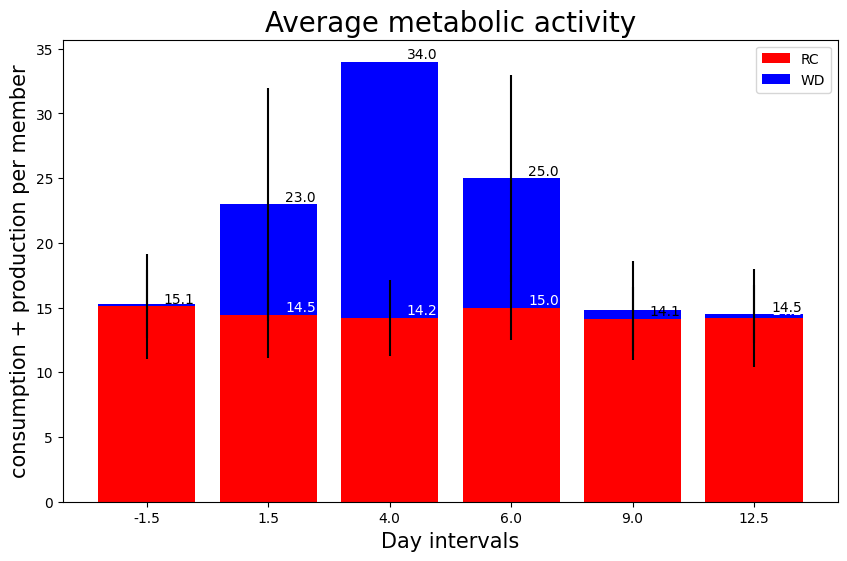

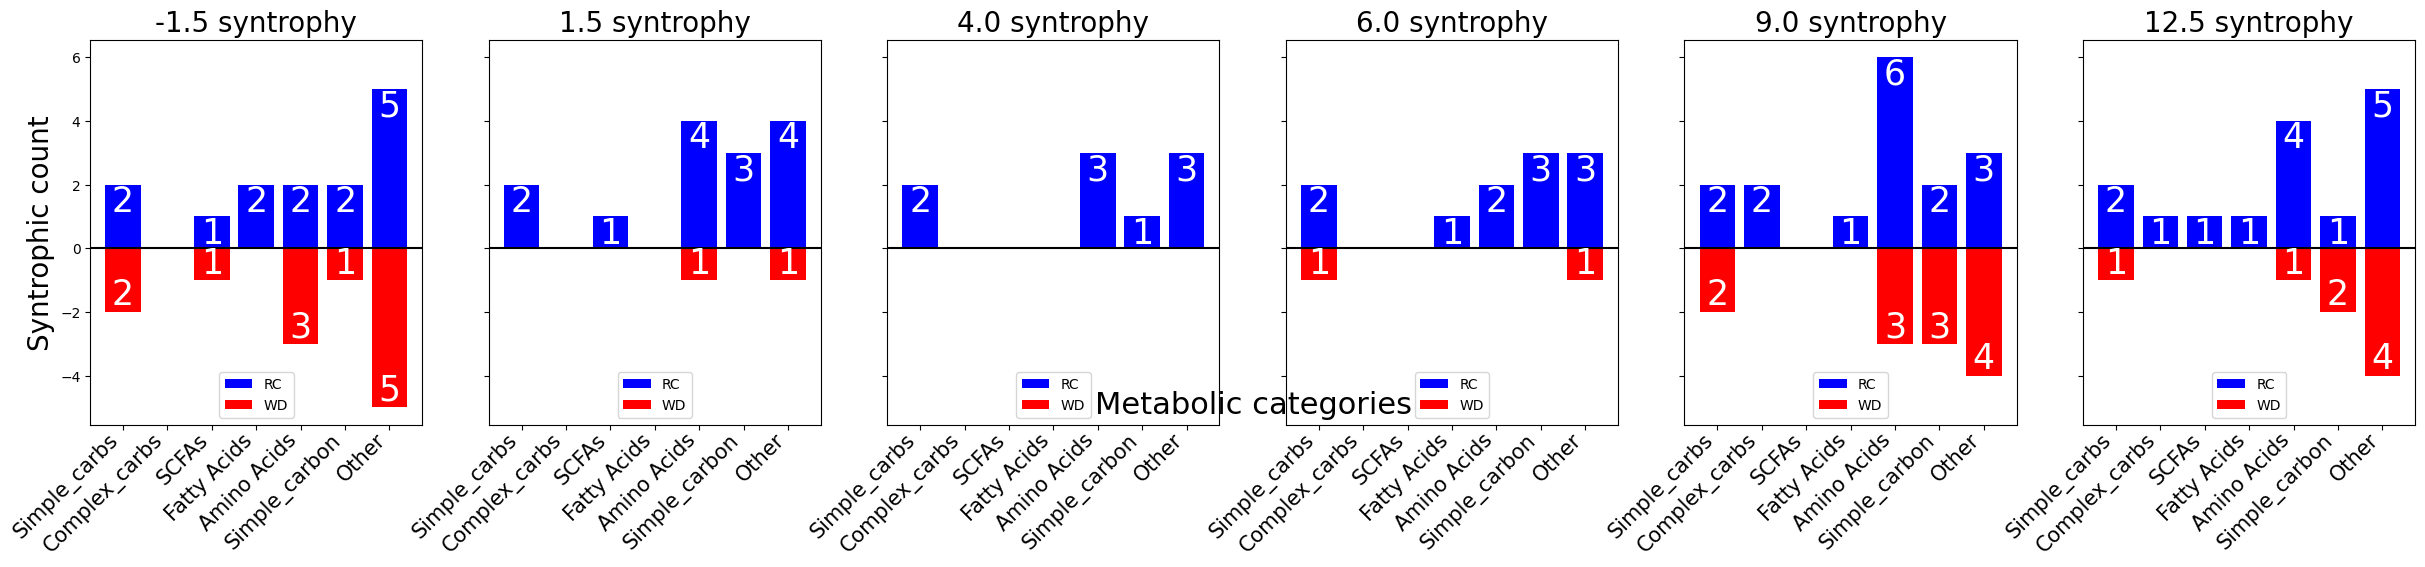

In [143]:
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot

# Original diverging bar chart
def divergingBarChartCat(category, width=6):
    ## simple carbs
    fig, ax = pyplot.subplots(figsize=(10, 6))
    rc, wd = [], []
    for dic in InteractionCounts[category].to_list():
        rc.append(dic["RC"])
        wd.append(-dic["WD"])
    print(rc, wd)
    positive_bars = ax.bar(InteractionCounts.index, rc, width=width, color='red', label='RC')  # InteractionCounts['Positive'], 
    negative_bars = ax.bar(InteractionCounts.index, wd, width=width, color='blue', label='WD')  # InteractionCounts['Negative'], 


    ### Add text labels above each bar
    for bar in positive_bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
                ha='center', va='bottom', fontsize=10, color='black')

    for bar in negative_bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{abs(bar.get_height())}', 
                ha='center', va='top', fontsize=10, color='black')

    ### curtail the figure
    # x_max = max(max(rc), -min(wd))
    # ax.set_xlim(-x_max, x_max)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    for label in ax.get_xticklabels():
        label.set_y(label.get_position()[1] - 0.02)  # Adjust the y position of the tick labels
    ax.set_xlabel('days')
    ax.set_ylabel('number of exchanges')
    ax.set_title(f"{' '.join(category.split('_'))} syntrophy count")
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, 0))

    ### Add grid lines for better readability
    # ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.axhline(0, -1.5, 12.5, color="black")
    fig.savefig(f"{category}_diverging_barChart_NoFit.png")
    
    
# new diverging bar chart
def divergingBarChartDay(InteractionCounts, width=0.8):
    fig, axs = pyplot.subplots(1, len(InteractionCounts), figsize=(30, 5), sharey=True)
    for index, day in enumerate(InteractionCounts.index):
        ## simple carbs
        # fig, ax = pyplot.subplots(figsize=(10, 6))
        rc, wd = [], []
        for dic in InteractionCounts.loc[day].to_list():
            rc.append(dic["RC"])
            wd.append(-dic["WD"])
        print(rc, wd)
        positive_bars = axs[index].bar(InteractionCounts.columns, rc, width=width, color='blue', label='RC')  # InteractionCounts['Positive'], 
        negative_bars = axs[index].bar(InteractionCounts.columns, wd, width=width, color='red', label='WD')  # InteractionCounts['Negative'], 


        ### Add text labels above each bar
        for bar in positive_bars:
            if bar.get_height() == 0:  continue
            axs[index].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
                    ha='center', va='top', fontsize=25, color='white')

        for bar in negative_bars:
            if bar.get_height() == 0:  continue
            axs[index].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{abs(bar.get_height())}', 
                    ha='center', va='bottom', fontsize=25, color='white')

        ### curtail the figure
        # x_max = max(max(rc), -min(wd))
        # ax.set_xlim(-x_max, x_max)
        axs[index].yaxis.set_major_locator(MaxNLocator(integer=True))
        # ax.xticklabels(rotation=45)
        axs[index].tick_params(axis='x', rotation=45, labelsize=15, pad=0)
        for label in axs[index].get_xticklabels():
            # label.set_rotation(45)
            # label.set_fontsize(15)
            label.set_horizontalalignment("right")
        # axs[index].set_xlabel('Metabolic categories', fontsize=20)
        if index == 0:
            axs[index].set_ylabel('Syntrophic count', fontsize=20)
        axs[index].set_title(f"{day} syntrophy", fontsize=20)
        axs[index].legend(loc='lower center', bbox_to_anchor=(0.5, 0))

        ### Add grid lines for better readability
        # ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        axs[index].axhline(0, -1.5, 12.5, color="black")
        # fig.savefig(f"{day}_diverging_barChart_NoFit.png")
    fig.text(0.46, 0.15, 'Metabolic categories', va='center', fontsize=22)
    # fig.tight_layout()
    fig.savefig("diverging_barChart_NoFit.png", bbox_inches='tight', dpi=300)


def averageConnectedness(averages, errors):
    fig, ax = pyplot.subplots(figsize=(10, 6))
    wd_label, rc_label = False, False
    for day, content in averages.items():
        for diet, ave in content.items():
            error = errors[day][diet]
            if diet == "WD":
                color = "black"
                bars = ax.bar([day], [ave-averages[day]["RC"]], color="blue", label=diet if not wd_label else "",
                              yerr=error, bottom=[averages[day]["RC"]])
                wd_label = True
            else:
                color = "white"
                bars = ax.bar([day], [ave], color='red', label=diet if not rc_label else "", yerr=error, bottom=[0])
                rc_label = True
            for bar in bars:
                ax.text(bar.get_x() + bar.get_width()/1.2, ave, '%.1f' %(ave), ha='center', va='bottom', fontsize=10, color=color)
    ax.set_xlabel('Day intervals', fontsize=15)
    ax.set_ylabel('consumption + production per member', fontsize=15)
    ax.set_title("Average metabolic activity", fontsize=20)
    ax.legend()
    fig.savefig(f"aveMetabolicActivity_NoFit.png")
    


averageConnectedness(averages, errors)


# for col in InteractionCounts.columns:
#     divergingBarChartCat(col, 0.8)
divergingBarChartDay(InteractionCounts)


In [13]:
from itertools import product

days, diets = ["-1.5", "1.5", "4.0", "9.0", "12.5"], ["RC", "WD"]
print([x for x in product(days, diets)])

[('-1.5', 'RC'), ('-1.5', 'WD'), ('1.5', 'RC'), ('1.5', 'WD'), ('4.0', 'RC'), ('4.0', 'WD'), ('9.0', 'RC'), ('9.0', 'WD'), ('12.5', 'RC'), ('12.5', 'WD')]


# define new metabolite categories

In [14]:
from modelseedpy.biochem import from_local

msdb = from_local("../../ModelSEEDDatabase")

In [15]:
# from deepdiff import DeepDiff
from numpy import array, load, append, save, concatenate, setdiff1d

scfa = load("../../CommScores/commscores/data/categories/scfa.npy")
vitamins = load("../../CommScores/commscores/data/categories/vitamins.npy")
aminoAcids = load("../../CommScores/commscores/data/categories/aminoAcids.npy")
sugars = load("../../CommScores/commscores/data/categories/sugars.npy")
# complex_sugars = array([["cpd00158", "CELB"], ["cpd00382", "Melitose"]])
# save("../../CommScores/commscores/data/categories/complex_sugars.npy", complex_sugars)
# sugars_dict = dict(sugars)
# new_sugars_dict = {}
# for cpdID, name in sugars_dict.items():
#     if name not in ["CELB", "Melitose"]:
#         new_sugars_dict[cpdID] = name
# sugars = array(list(zip(new_sugars_dict.keys(), new_sugars_dict.values())))
# save("../../CommScores/commscores/data/categories/sugars.npy", sugars)
# print(DeepDiff(sugars_dict, new_sugars_dict))
complex_sugars = load("../../CommScores/commscores/data/categories/complex_sugars.npy")
# new_sugars = setdiff1d(sugars, complex_sugars)
# display(new_sugars)
# new_sugars = subtract(sugars, array([["cpd00158", "CELB"], ["cpd00382", "Melitose"]]))
# display(new_sugars)
# save("../../CommScores/commscores/data/categories/sugars.npy", new_sugars)
energy_compounds = load("../../CommScores/commscores/data/categories/energy_compounds.npy")

In [16]:
from numpy import save, delete
fatty_acids = [["cpd01113", "Hexanoate"], ["cpd03846", "Octanoate"], ["cpd01107", "Caprate"], ["cpd01741", "Laurate"],
               ["cpd15640", "Tridecanoate"], ["cpd03847", "Myristate"], ["cpd16351", "Pentadecanoate"], ["cpd00214", "Palmitate"],
               ["cpd15609", "heptadecanoate"], ["cpd01080", "Stearate"], ["cpd00536", "Oleate"],
               ["cpd01122", "Linoelate"], ["cpd03850", "Linoleate"], ["cpd03848", "Arachidate"]]
save("../../CommScores/commscores/data/categories/fattyAcids.npy", fatty_acids)

In [17]:
display(aminoAcids)

array([['cpd00035', 'Alanine'],
       ['cpd00051', 'L-Arginine'],
       ['cpd00132', 'L-Asparagine'],
       ['cpd00041', 'L-Aspartate'],
       ['cpd00084', 'L-Cysteine'],
       ['cpd00023', 'L-Glutamate'],
       ['cpd00053', 'L-Glutamine'],
       ['cpd00033', 'Glycine'],
       ['cpd00119', 'L-Histidine'],
       ['cpd00747', 'L-Hydroxyproline'],
       ['cpd00322', 'L-Isoleucine'],
       ['cpd00107', 'L-Leucine'],
       ['cpd00039', 'L-Lysine'],
       ['cpd00060', 'L-Methionine'],
       ['cpd00066', 'L-Phenylalanine'],
       ['cpd00129', 'L-Proline'],
       ['cpd00054', 'L-Serine'],
       ['cpd00161', 'L-Threonine'],
       ['cpd00065', 'L-Tryptophan'],
       ['cpd00069', 'L-Tyrosine'],
       ['cpd00156', 'L-Valine']], dtype='<U16')

In [147]:
from numpy import concatenate, array, save
# define the sets of amino acids
aromaticAA = array([['cpd00066', 'L-Phenylalanine'], ['cpd00069', 'L-Tyrosine'], ['cpd00065', 'L-Tryptophan']])
pyruvateAA = array([['cpd00035', 'Alanine'], ['cpd00107', 'L-Leucine'], ['cpd00322', 'L-Isoleucine'], ['cpd00156', 'L-Valine']])
alphaKetaGlutarateAA = array([['cpd00023', 'L-Glutamate'], ['cpd00053', 'L-Glutamine'], ['cpd00129', 'L-Proline'], ['cpd00051', 'L-Arginine'],
                              ['cpd00747', 'L-Hydroxyproline']])
oxaloacetateAA = array([['cpd00132', 'L-Asparagine'], ['cpd00041', 'L-Aspartate'], 
                        ['cpd00060', 'L-Methionine'], ['cpd00161', 'L-Threonine'], ['cpd00039', 'L-Lysine']])
phosphoglycerateAA = array([['cpd00054', 'L-Serine'], ['cpd00033', 'Glycine'], ['cpd00084', 'L-Cysteine'], ["cpd00550", "D-Serine"]])
oxoAAs = array([["cpd01293", "Oxoproline"], ["cpd01292", "Oxoproline"], ["cpd00024", "2-Oxoglutarate"], ["", "Pyroglutamic acid"]])

allAAs = concatenate([aromaticAA, pyruvateAA, alphaKetaGlutarateAA, oxaloacetateAA, phosphoglycerateAA, oxoAAs])

# save the amino acid categories
save("../../CommScores/commscores/data/categories/aromaticAA.npy", aromaticAA)
save("../../CommScores/commscores/data/categories/pyruvateAA.npy", pyruvateAA)
save("../../CommScores/commscores/data/categories/alphaKetaGlutarateAA.npy", alphaKetaGlutarateAA)
save("../../CommScores/commscores/data/categories/oxaloacetateAA.npy", oxaloacetateAA)
save("../../CommScores/commscores/data/categories/phosphoglycerateAA.npy", phosphoglycerateAA)
save("../../CommScores/commscores/data/categories/oxoAAs.npy", oxoAAs)
save("../../CommScores/commscores/data/categories/allAAs.npy", allAAs)

In [68]:
from numpy import concatenate, save

all_specifiedAAs = concatenate([aromaticAA, pyruvateAA, alphaKetaGlutarateAA, oxaloacetateAA, phosphoglycerateAA])
for aa in aminoAcids:
    if aa not in all_specifiedAAs:
        print(aa)
        
save("../../CommScores/commscores/data/categories/all_specifiedAAs.npy", all_specifiedAAs)

['cpd00119' 'L-Histidine']


In [20]:
scfa
# new_energy_compounds = []
# for cpd, name in energy_compounds:
#     # print(cpd, name)
#     if name in fatty_acids:
#         new_energy_compounds = delete(energy_compounds, name, 1)

array([['cpd00029', 'Acetate'],
       ['cpd00141', 'Propionate'],
       ['cpd00211', 'Butyrate'],
       ['cpd01711', 'Isobutyrate'],
       ['cpd00597', 'Valerate'],
       ['cpd16265', 'M_2_Keto_isovalerate'],
       ['cpd35499', '(S)-2-methylbutanoate'],
       ['cpd00106', 'Fumarate']], dtype='<U21')

In [21]:
print(len(energy_compounds))

29614


## categorizing compounds

In [22]:
from json import load

with open("ASVInteractionModel-NoFit.json", 'r') as jsonIn:
    model = load(jsonIn)

# check which vitamins are in the model
# metabolites = [met["id"] for met in model["metabolites"]]
# vitamin_dict = dict(vitamins)
# for metID in metabolites:
#     if metID in vitamin_dict:
#         print(metID)

# define dictionaries of all the categories
## amino acids
aromaticAA_dict, pyruvateAA_dict, alphaKetaGlutarateAA_dict = dict(aromaticAA), dict(pyruvateAA), dict(alphaKetaGlutarateAA)
oxaloacetateAA_dict, phosphoglycerateAA_dict, oxoAA_dict = dict(oxaloacetateAA), dict(phosphoglycerateAA), dict(oxoAAs)
## fatty acids
fatty_acids_dict, scfa_dict, sugars_dict, complex_sugars_dict = dict(fatty_acids), dict(scfa), dict(sugars), dict(complex_sugars)

# categorize the model metabolites
not_changed = []
for met in model["metabolites"]:
    ## amino acids
    if met["id"] in aromaticAA_dict:   met["id"] = "Aromatic AA"
    elif met["id"] in pyruvateAA_dict:   met["id"] = "Pyruvate AA"
    elif met["id"] in alphaKetaGlutarateAA_dict:   met["id"] = "alphaKetaGlutarate AA"
    elif met["id"] in oxaloacetateAA_dict:   met["id"] = "Oxaloacetate AA"
    elif met["id"] in phosphoglycerateAA_dict:   met["id"] = "phosphoGlycerate AA"
    elif met["id"] in oxoAA_dict:   met["id"] = "oxoAA"
    ## other compounds
    elif met["id"] in fatty_acids_dict:   met["id"] = "fatty Acid"
    elif met["id"] in scfa_dict:   met["id"] = "scFatty Acid"
    elif met["id"] in sugars_dict:   met["id"] = "Sugar"
    elif met["id"] in complex_sugars_dict:   met["id"] = "complex Sugar"
    else:   not_changed.append(met["id"])

print(f"{len(not_changed)}/{len(model['metabolites'])} compounds are not yet exchanged")
print(not_changed)

# export the converted model
from json import dump
print(model["metabolites"])
with open("ASVInteractionModel-NoFit_categorizedIDs.json", 'w') as jsonOut:
    dump(model, jsonOut, indent=3)

18/63 compounds are not yet exchanged
['cpd35610', 'cpd00851', 'cpd07053', 'cpd02475', 'cpd04945', 'cpd00122', 'cpd00526', 'cpd00137', 'cpd02733', 'cpd00119', 'cpd00359', 'cpd00121', 'cpd00130', 'cpd00392', 'cpd00218', 'cpd00064', 'cpd00020', 'cpd00036']
[{'id': 'cpd35610', 'name': '3alpha-hydroxy-7-oxo-5beta-cholan-24-oate', 'compartment': ''}, {'id': 'cpd00851', 'name': 'trans-4-Hydroxy-L-proline', 'compartment': ''}, {'id': 'oxoAA', 'name': '5-Oxoproline', 'compartment': ''}, {'id': 'cpd07053', 'name': 'Picolinic acid', 'compartment': ''}, {'id': 'cpd02475', 'name': 'Lithocholate', 'compartment': ''}, {'id': 'cpd04945', 'name': 'Ursodiol', 'compartment': ''}, {'id': 'scFatty Acid', 'name': 'Acetate', 'compartment': ''}, {'id': 'cpd00122', 'name': 'N-Acetyl-D-glucosamine', 'compartment': ''}, {'id': 'oxoAA', 'name': '2-Oxoglutarate', 'compartment': ''}, {'id': 'Pyruvate AA', 'name': 'L-Alanine', 'compartment': ''}, {'id': 'Sugar', 'name': 'D-Allose', 'compartment': ''}, {'id': 'Sugar

# filtering the Escher map of low fluxes and specific compounds

In [6]:
aa_names = ["L-Methionine", "L-Histidine", "L-Tryptophan", "L-Alanine", "L-Threonine", "L-Glutamate", "L-Isoleucine", "L-Proline", "L-Leucine", "Glycine",
 'L-Phenylalanine', 'L-Tyrosine', 'L-Valine', 'L-Glutamine', 'L-Arginine', 'L-Asparagine', 'L-Aspartate', 'L-Lysine', 'L-Serine', 'L-Cysteine', "D-Serine",
 "5-Oxoproline"]

In [15]:
from json import load, dump

map_name = "merged_escher_2.json"
with open(map_name, 'r') as jsonIn:
    escherMap = load(jsonIn)
# display(escherMap)

og_escherMap = [ele for ele in escherMap]

# from collections import Counter
nodeID = {nodeNum: content["bigg_id"] for nodeNum, content in og_escherMap[1]["nodes"].items() if "bigg_id" in content}
with open("Escher_nodeNum_cpdIDs.json", 'w') as jsonOut:
    dump(nodeID, jsonOut, indent=3)

idName = {content["bigg_id"]: content["name"] for content in og_escherMap[1]["nodes"].values() if "bigg_id" in content}
with open("EscherNodeMapping.json", 'w') as jsonOut:
    dump(idName, jsonOut, indent=3)

newEscher = []
for index, ele in enumerate(og_escherMap):
    og_ele = {k:v for k,v in ele.items()}
    if index == 0:  newEscher = [ele]
    newEscher.append({})
    nodes_to_remove = []
    nodeNumCoef = {}
    for k, val in ele.items():
        if k == "reactions":
            newEscher[index][k] = val
            # newEscher[index][k] = {}
            # reactions = {}
            for rxnNum, content in val.items():
                # display(len(content["metabolites"]), content)
                # print(len(content["metabolites"]))
                #create a mapping from IDs to their respective coefficients
                metCoefs = {met["bigg_id"]: met["coefficient"] for met in content["metabolites"]}
                nameID = {}
                # print(metCoefs)
                for ID in metCoefs.keys():
                    if ID not in idName:   continue
                    name = idName[ID]
                    if name in nameID: nameID[name].append(ID)
                    else: nameID[name] = [ID]
                #determine the nodes that should be removed
                nodeNumIDs = {content2["to_node_id"]: nodeID[content2["to_node_id"]]
                              for content2 in content["segments"].values() if content2["to_node_id"] in nodeID.keys()}
                nodeNumIDs.update({content2["from_node_id"]: nodeID[content2["from_node_id"]]
                                   for content2 in content["segments"].values() if content2["from_node_id"] in nodeID.keys()})
                nodeNumCoef.update({num: metCoefs[ID] for num, ID in nodeNumIDs.items()})
                # print(nodeNumCoef)
                # for nodeNum, coef in nodeNumCoef.items():
                #     if coef < 0.01:   nodes_to_remove.append(nodeNum)
                #     elif "AA" in idName[content["bigg_id"]] and metCoefs[content["bigg_id"]] < 0.1:  continue
                #     for k2, v in content.items():
                #         if k2 == "node_is_primary" and metCoefs[content["bigg_id"]] >= 1:
                #             new_nodes[nodeNum][k2] = True
                #         else:  new_nodes[nodeNum][k2] = v

                # names = Counter([idName[ID]:ID for ID in metCoefs.keys()])
                #determine the ID with the highest coefficient, which will be exclusively kept in the final Escher
                # new_met_content = []
                # for k2,v in nameID.items():
                #     if metCoefs[content["bigg_id"]] < 0.01:   continue
                #     elif "AA" in idName[content["bigg_id"]] and metCoefs[content["bigg_id"]] < 0.1:  continue
                #     for k2, v in content.items():
                #         if k2 == "node_is_primary" and metCoefs[content["bigg_id"]] >= 1:
                #             new_nodes[nodeNum][k2] = True
                #         else:  new_nodes[nodeNum][k2] = v
                #     if len(v) == 1:
                #         new_met_content.append({"bigg_id": v[0], "coefficient": metCoefs[v[0]]})
                #     elif len(v) > 1:
                #         ReactantWinner, ProductWinner = [None, 0], [None, 0]
                #         for ID, coef in metCoefs.items():
                #             if ID in v:
                #                 if coef > 0 and coef > ProductWinner[1]:
                #                     ProductWinner = [ID, coef]
                #                 if coef < 0 and coef < ReactantWinner[1]:
                #                     ReactantWinner = [ID, coef]
                #         for met in content["metabolites"]:
                #             if met["bigg_id"] in v and met["bigg_id"] in [ReactantWinner[0], ProductWinner[0]]:
                #                 new_met_content.append(met)
                # print(len(new_met_content), len(content["metabolites"]))
                #update the new Escher Figure
                newEscher[index][k][rxnNum] = content
                # for key, value in content.items():
                #     if key == "metabolites":
                #         newEscher[index][k][rxnNum][key] = new_met_content
                #     else:
                #         newEscher[index][k][rxnNum][key] = value
                # escherMap[index]["reactions"][rxnNum]["metabolites"] = new_met_content
                # print(len(content["metabolites"]) == len(newEscher[index][k][rxnNum]["metabolites"]))
                # display(len(new_met_content), escherMap[index]["reactions"][rxnNum]["metabolites"])
                # break
    # display(nodeNumCoef)
    for k, val in ele.items():
        if k == "nodes":
            new_nodes = {}
            # display(val)
            for nodeNum, content in val.items():
                # display(content)
                new_nodes[nodeNum] = {}
                if nodeNum in nodeNumCoef:
                    # print(nodeID[nodeNum], nodeNumCoef[nodeNum])
                    if abs(nodeNumCoef[nodeNum]) < 0.05:   continue
                    if idName[content["bigg_id"]] in aa_names:  continue # and abs(nodeNumCoef[nodeNum]) < 0.1:  continue
                    if idName[content["bigg_id"]] in ["Niacin", "Acetate"]:  continue
                    # if abs(nodeNumCoef[nodeNum]) >= 1:   primary = True
                for k2, v in content.items():
                    if k2 == "node_is_primary":  new_nodes[nodeNum][k2] = True
                    else:  new_nodes[nodeNum][k2] = v
            # break
            #remove all of the above nodes, which should remove the segments by default
            #replace the IDs with their categories so that the nodes can consolidate
            newEscher[index][k] = new_nodes
            # DeepDiff(val, new_nodes)
        elif k != "reactions":
            newEscher[index][k] = val
    # print(DeepDiff(og_ele, newEscher[index]))

from deepdiff import DeepDiff
# display(DeepDiff(og_escherMap[1], newEscher[1]))

from json import dump
with open(map_name.replace(".json", "_reduced.json"), 'w') as jsonOut:
    dump(newEscher, jsonOut, indent=3)

#make each column an interacting web, which can feed into the next column through some type of overlapping metabolites
#the fatty acids and the sugars will likely be the differentiating factor between the RC and WD regimes
#amino acids and niacin are the insurance policy for syntrophy, and should be used as the structure of the food web 
#group the members who have the same major products, and group seemingly parasitic organisms separately, by programmatically analyzing the highest fluxes for each organism's reactants and products

In [8]:
from collections import Counter
print(Counter(aa_names))

Counter({'L-Methionine': 1, 'L-Histidine': 1, 'L-Tryptophan': 1, 'L-Alanine': 1, 'L-Threonine': 1, 'L-Glutamate': 1, 'L-Isoleucine': 1, 'L-Proline': 1, 'L-Leucine': 1, 'Glycine': 1, 'L-Phenylalanine': 1, 'L-Tyrosine': 1, 'L-Valine': 1, 'L-Glutamine': 1, 'L-Arginine': 1, 'L-Asparagine': 1, 'L-Aspartate': 1, 'L-Lysine': 1, 'L-Serine': 1, 'L-Cysteine': 1, 'D-Serine': 1, '5-Oxoproline': 1})


### manually restore syntrophic compounds

In [26]:
# Turicibacter

info = {"name":"Turicibacter.1","bigg_id":"Turicibacter.1RC-ABX_-1.5","reversibility":False,"label_x":-2050.9305419921875,"label_y":8288.802734375,"gene_reaction_rule":"","genes":[],"metabolites":[{"bigg_id":"cpd00023","coefficient":-0.1040152173141567},{"bigg_id":"cpd00041","coefficient":-0.1042731995047922},{"bigg_id":"cpd00064","coefficient":0.0241392199676796},{"bigg_id":"cpd00084","coefficient":-0.3059013174870795},{"bigg_id":"cpd00108","coefficient":0.3980953511859826},{"bigg_id":"cpd00122","coefficient":-0.225680761223981},{"bigg_id":"cpd00129","coefficient":-0.0200989691680044},{"bigg_id":"cpd00132","coefficient":-0.0185135542972458},{"bigg_id":"cpd00141","coefficient":-0.0158535137273317},{"bigg_id":"cpd00161","coefficient":-0.0233209413247074},{"bigg_id":"cpd00211","coefficient":-0.0817767218820333},{"bigg_id":"cpd00214","coefficient":-0.0129732900159796},{"bigg_id":"cpd00218","coefficient":-0.0016870647208757},{"bigg_id":"cpd00322","coefficient":-0.0337539940226029}],"segments":{"296":{"from_node_id":"313","to_node_id":"314","b1":None,"b2":None},"297":{"from_node_id":"315","to_node_id":"314","b1":None,"b2":None},"298":{"from_node_id":"313","to_node_id":"312","b1":{"x":-1967.361572265625,"y":8418.39892578125},"b2":{"x":-2236.64208984375,"y":8412.42578125}},"299":{"from_node_id":"313","to_node_id":"316","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2131.64208984375,"y":8322.42578125}},"300":{"from_node_id":"315","to_node_id":"317","b1":{"x":-1843.361572265625,"y":8418.39892578125},"b2":{"x":-1789.111572265625,"y":8418.39892578125}},"301":{"from_node_id":"313","to_node_id":"318","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2146.64208984375,"y":8340.42578125}},"302":{"from_node_id":"315","to_node_id":"319","b1":{"x":-1839.361572265625,"y":8418.39892578125},"b2":{"x":-1834.111572265625,"y":8436.39892578125}},"303":{"from_node_id":"313","to_node_id":"320","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2161.64208984375,"y":8358.42578125}},"304":{"from_node_id":"313","to_node_id":"321","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2176.64208984375,"y":8376.42578125}},"305":{"from_node_id":"313","to_node_id":"322","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2191.64208984375,"y":8394.42578125}},"306":{"from_node_id":"313","to_node_id":"323","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2191.64208984375,"y":8430.42578125}},"307":{"from_node_id":"313","to_node_id":"324","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2176.64208984375,"y":8448.42578125}},"308":{"from_node_id":"313","to_node_id":"325","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2161.64208984375,"y":8466.42578125}},"309":{"from_node_id":"313","to_node_id":"326","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2146.64208984375,"y":8484.42578125}},"310":{"from_node_id":"313","to_node_id":"327","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2131.64208984375,"y":8502.42578125}},"311":{"from_node_id":"313","to_node_id":"328","b1":{"x":-1971.361572265625,"y":8418.39892578125},"b2":{"x":-2116.64208984375,"y":8520.42578125}}}}

In [20]:
for num, content in info["segments"].items():
    if "from_node_id" not in content:  continue
    # print(content["from_node_id"], content["to_node_id"])
    print(nodeID[content["from_node_id"]] if content["from_node_id"] in nodeID else "None")
    print((content["to_node_id"], nodeID[content["to_node_id"]], idName[nodeID[content["to_node_id"]]]) if content["to_node_id"] in nodeID else "None")

None
None
None
None
None
None
None
None
None
None
None
None
None
('319', 'cpd00108', 'Galactose')
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


# editing the SVG Escher Map

In [10]:
from modelseedpy.biochem import from_local
msdb = from_local("../../ModelSEEDDatabase")

modelseedpy 0.3.3


In [11]:
cpd = msdb.compounds.get_by_id("cpd00027")
print(dir(cpd))
print(cpd.annotation["BiGG"])

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotation', '_bound', '_id', '_model', '_reaction', '_repr_html_', '_set_id_with_model', 'abbr', 'annotation', 'charge', 'compartment', 'constraint', 'copy', 'delta_g', 'delta_g_error', 'elements', 'flags', 'formula', 'formula_weight', 'id', 'inchi', 'inchi_key', 'is_abstract', 'is_cofactor', 'is_core', 'is_obsolete', 'linked_compound', 'mass', 'model', 'name', 'names', 'notes', 'pka', 'pkb', 'reactions', 'remove_from_model', 'seed_id', 'shadow_price', 'smiles', 'source', 'summary', 'to_template_compartment_compound', 'y']
{'glc__D'}


### updating the JSON file

In [23]:
from pandas import DataFrame

nameAbbrev = DataFrame(columns=["name", "abbrev", "ID"])

cpdID_abbrv = {
    'cpd00076': 'sucr', 'cpd00141': 'prpa', 'cpd00211': 'butr', 'cpd00130': 'malat', 'cpd00137': 'citr', 'cpd00024': 'akg', 
    'cpd00036': 'succ', 'cpd00064': 'ornth', 'cpd03847': 'myrst', 'cpd00106': 'fumr', 'cpd00108': 'galct', 'cpd00382': 'melit', 
    'cpd00105': 'ribs', 'cpd00121': 'inost', 'cpd00751': 'fucos', 'cpd00122': 'acglum', 'cpd00158': 'cellb', 
    'cpd00214': 'palm', 'cpd03198': 'melib', 'cpd01171': 'dulco', 'cpd00020': 'pyr', 'cpd00224': 'arbns', 'cpd00082': 'fru', 
    'cpd00851': '4hpro', 'cpd01107': 'decac', 'cpd00396': 'rhmn', 'cpd01055': 'allos', 'cpd00027': 'glu', 
    'cpd01242': '2drib', "cpd00218": "nac", "cpd00029": "ac", "cpd00550": "ser", "cpd01293": "5oxpro"}

for cpdID, abbrev in cpdID_abbrv.items():
    cpd = msdb.compounds.get_by_id(cpdID)
    nameAbbrev.loc[len(nameAbbrev)] = [cpd.name, abbrev, cpdID]

display(nameAbbrev)
print(len(cpdID_abbrv))
nameAbbrev.to_csv("nameAbbrev.csv")

,name,abbrev,ID
0,Sucrose,sucr,cpd00076
1,Propionate,prpa,cpd00141
2,Butyrate,butr,cpd00211
3,L-Malate,malat,cpd00130
4,Citrate,citr,cpd00137
5,2-Oxoglutarate,akg,cpd00024
6,Succinate,succ,cpd00036
7,Ornithine,ornth,cpd00064
8,Myristic acid,myrst,cpd03847
9,Fumarate,fumr,cpd00106


33


In [24]:
from json import load, dump

def cleanEscherJSON(escherPath):
    with open(escherPath, 'r') as jsonIn:
        escherMap = load(jsonIn)

    # exchange the nodeIDs
    nodes_to_delete = []
    for nodeNum, content in escherMap[1]["nodes"].items():
        if content == {}:
            # del escherMap[1]["nodes"][nodeNum]
            nodes_to_delete.append(nodeNum)
            continue
        if content["node_type"] == "metabolite":
            content["name"] = cpdID_abbrv[content["bigg_id"]]

    for nodeNum in nodes_to_delete:
        escherMap[1]["nodes"].pop(nodeNum)

    # exchange the rxnIDs
    for content in escherMap[1]["reactions"].values():
        # content["name"] = content["bigg_id"]
        # content["name"] = content["name"].split('_')[0].replace("-ABX", '').replace("RC", '').replace("WD", '')
        content["name"] = content["name"].split('.')[0][:6] + "." + content["name"].split('.')[1]

    with open(escherPath.replace(".json", "_cleaned0.json"), 'w') as jsonOut:
        dump(escherMap, jsonOut, indent=3)

cleanEscherJSON("merged_escher_2.json")

In [441]:
# from json import load, dump

# with open("metabolite_focused_map_IDs_cleaned.json", 'r') as jsonIn:
#     oldEscher = load(jsonIn)

# with open("metabolite_focused_map_IDs_cleaned0.json", 'r') as jsonIn:
#     newEscher = load(jsonIn)

# for rxnNum, content in oldEscher[1]["reactions"].items():
#     content["name"] = newEscher[1]["reactions"][rxnNum]["name"]
#     content["bigg_id"] = newEscher[1]["reactions"][rxnNum]["bigg_id"]

# for nodeNum, content in oldEscher[1]["nodes"].items():
#     if "name" in newEscher[1]["nodes"][nodeNum]:
#         content["name"] = newEscher[1]["nodes"][nodeNum]["name"]
#         content["bigg_id"] = newEscher[1]["nodes"][nodeNum]["bigg_id"]

# with open("metabolite_focused_map_IDs_cleaned.json", 'w') as jsonOut:
#     dump(oldEscher, jsonOut, indent=3)

### create hashes for the various map contents

In [90]:
from json import load

# defining the reactants and products
with open("ASVInteractionModel-NoFit_filtered.json", 'r') as jsonIn:
    model = load(jsonIn)

directionTracking, memNodes, metNodes = {}, {}, {}
for diet in ["RC", "WD"]:
    directionTracking[diet], memNodes[diet], metNodes[diet] = {}, {}, {}
    for day in ["-1.5", "1.5", "4.0", "6.0", "9.0", "12.5"]:
        directionTracking[diet][day], memNodes[diet][day], metNodes[diet][day] = {}, {}, {}

for content in model["reactions"]:
    nameParts = content["id"].split("-ABX")
    diet = nameParts[0][-2:]
    # print(content["id"])
    # diet = content["id"][:2]
    nameParts[0] = nameParts[0][:-2]
    day = nameParts[1].split("_")[1]
    # day = content["id"].split("_")[1]
    simpleName = nameParts[0].split(".")[0][:6]+"."+nameParts[0].split(".")[1]
    # parts = content["id"].split(".")
    # simpleName = parts[-2] + "." + parts[-1]
    # print(diet, day, simpleName)
    directionTracking[diet][day][simpleName] = {"ID":"", "segments":{"consumption":{}, "production":{}}, "reactants": [], "products":[]}
    for ID, flux in content["metabolites"].items():
        flux = float(flux)
        if flux < 0:   directionTracking[diet][day][simpleName]["reactants"].append(ID)
        elif flux > 0:   directionTracking[diet][day][simpleName]["products"].append(ID)
    # directionTracking[diet][day][simpleName]["reactants"] = {ID:"" for ID in directionTracking[diet][day][simpleName]["reactants"]}
    # directionTracking[diet][day][simpleName]["products"] = {ID:"" for ID in directionTracking[diet][day][simpleName]["products"]}

    
    
# mapping model IDs to objects IDs
with open("merged_escher_2_cleaned0.json", 'r') as jsonIn:
    escherMap = load(jsonIn)

consumptionEdges = []
for rxnNum, content in escherMap[1]["reactions"].items():
    # nameParts = content["bigg_id"].split("-ABX")
    # nameParts = content["bigg_id"].split("-ABX")
    # print(content["bigg_id"])
    diet = content["bigg_id"][:2]
    day = content["bigg_id"].split("_")[0][2:]
    rxnName = content["name"]
    # print(diet, day, rxnName)
    directionTracking[diet][day][rxnName]["ID"] = f"r{rxnNum}"
    # print(rxnName, content["segments"])
    for segNum, content2 in content["segments"].items():
        fromNode, toNode = content2["from_node_id"], content2["to_node_id"]
        # print(fromNode, toNode)
        fromID = escherMap[1]["nodes"][fromNode].get("bigg_id", '')
        toID = escherMap[1]["nodes"][toNode].get("bigg_id", '')
        metNodes[diet][day].update({fromID: fromNode, toID: toNode})
        # print(segNum, fromNode, toNode, escherMap[1]["nodes"][toNode])
        # if fromID == '':
        #     if toID == '':  continue
        #     else: rxnType = "production"
        # elif toID == '':
        #     rxnType = "consumption"
        # else: print("broken")
        if fromID != '':  print(fromID, content["bigg_id"])
        
        # if segNum == "575":
        #     display(fromNode, fromID, toNode, toID, rxnType)
        if toID in directionTracking[diet][day][rxnName]["reactants"]:
            directionTracking[diet][day][rxnName]["segments"]["consumption"][cpdID_abbrv[toID]] = (f"s{segNum}", f"n{toNode}")
            # directionTracking[diet][day][rxnName]["segments"]["consumption"][f"s{segNum}"] = (f"n{toNode}", cpdID_abbrv[toID])
            consumptionEdges.append(f"s{segNum}")
        if toID in directionTracking[diet][day][rxnName]["products"]:
            directionTracking[diet][day][rxnName]["segments"]["production"][cpdID_abbrv[toID]] = (f"s{segNum}", f"n{toNode}")

with open("modelSVG_mapping.json", 'w') as jsonOut:
    dump(directionTracking, jsonOut, indent=3)

    

# Categorizing nodes as products or reactants so that their position can be programmatically adjusted and their edges can be flagged.
nodeCategories = {"producedNodes":set(), "consumedNodes":set(), "intermediateNodes":set()}
segment_categorization = {"reactant":[], "product":[]}
# last_segNum = 0
for rxnNum, content in escherMap[1]["reactions"].items():
    for segNum, content2 in content["segments"].items():
        fromNode, toNode = content2["from_node_id"], content2["to_node_id"]
        ## categorize the fromNode
        if "marker" in escherMap[1]["nodes"][toNode]["node_type"] and escherMap[1]["nodes"][fromNode]["node_type"] == "metabolite":
            print("here")
            segment_categorization["reactant"].append(segNum)
            if fromNode in nodeCategories["intermediateNodes"]:    pass
            elif fromNode not in nodeCategories["producedNodes"]:
                nodeCategories["consumedNodes"].add(fromNode)
            elif fromNode in nodeCategories["producedNodes"]:
                nodeCategories["producedNodes"].remove(fromNode)
                nodeCategories["intermediateNodes"].add(fromNode)
        ## categorize the toNode
        elif "marker" in escherMap[1]["nodes"][fromNode]["node_type"] and escherMap[1]["nodes"][toNode]["node_type"] == "metabolite":
            segment_categorization["product"].append(segNum)
            if toNode in nodeCategories["intermediateNodes"]:    pass
            elif toNode not in nodeCategories["consumedNodes"]:
                nodeCategories["producedNodes"].add(toNode)
            elif toNode in nodeCategories["consumedNodes"]:
                nodeCategories["consumedNodes"].remove(toNode)
                nodeCategories["intermediateNodes"].add(toNode)
                


# tracking members
for rxnNum, content in escherMap[1]["reactions"].items():
    diet = content["bigg_id"][:2]
    day = content["bigg_id"].split("_")[0][2:]
    member = content["name"]
    memNodes[diet][day][member] = f"r{rxnNum}"
    
    
# tracking metabolite nodes
for nodeNum, content in escherMap[1]["nodes"].items():
    if content["node_type"] != "metabolite":   continue
    print(content["id"])
    diet = content["id"][:2]
    day = content["id"].split("_")[0][2:]
    member = content["name"]
    memNodes[diet][day][member] = f"r{rxnNum}"



    # for index, (segNum, content2) in enumerate(content["segments"].items()):
        # if index == 0:
        #     baseNum = str(int(segNum)+int(last_segNum))
        #     json_to_svg[segNum] = baseNum
        # else:     json_to_svg[segNum] = str(int(segNum)+int(baseNum))
        # if index == len(content["segments"])-1:    last_segNum = segNum
        # print(segNum, last_segNum)

# display(json_to_svg)

# display(segment_categorization, nodeCategories)

cpd00036 RC-1.5_Alloiococcus.1
cpd00076 RC-1.5_Alloiococcus.1
cpd00082 RC-1.5_Alloiococcus.1
cpd00108 RC-1.5_Alloiococcus.1
cpd00122 RC-1.5_Alloiococcus.1
cpd00122 RC-1.5_Bacillus.4
cpd00024 RC-1.5_Burkholderiales.1
cpd00064 RC-1.5_Burkholderiales.1
cpd00082 RC-1.5_Burkholderiales.1
cpd00122 RC-1.5_Burkholderiales.1
cpd00382 RC-1.5_Burkholderiales.1
cpd03847 RC-1.5_Burkholderiales.1
cpd00106 RC-1.5_Desulfovibrio.1
cpd00122 RC-1.5_Desulfovibrio.1
cpd00137 RC-1.5_Desulfovibrio.1
cpd01107 RC-1.5_Desulfovibrio.1
cpd00024 RC-1.5_Lactobacillus.1
cpd00064 RC-1.5_Lactobacillus.1
cpd00076 RC-1.5_Lactobacillus.1
cpd00082 RC-1.5_Lactobacillus.1
cpd00122 RC-1.5_Lactobacillus.1
cpd01293 RC-1.5_Lactobacillus.1
cpd00064 RC-1.5_Lactobacillus.3
cpd00076 RC-1.5_Lactobacillus.3
cpd00076 RC-1.5_Lactobacillus.4
cpd00108 RC-1.5_Lactobacillus.4
cpd00122 RC-1.5_Lactobacillus.4
cpd00076 RC-1.5_Nosocomiicoccus.1
cpd00122 RC-1.5_Nosocomiicoccus.1
cpd00137 RC-1.5_Nosocomiicoccus.1
cpd00141 RC-1.5_Nosocomiicoccus.

KeyError: 'id'

In [85]:
metNodes

{}

In [60]:
nodeCategories

{'producedNodes': {'100',
  '109',
  '114',
  '120',
  '127',
  '128',
  '152',
  '157',
  '158',
  '159',
  '160',
  '161',
  '162',
  '163',
  '164',
  '165',
  '166',
  '167',
  '168',
  '169',
  '170',
  '171',
  '172',
  '173',
  '174',
  '179',
  '180',
  '182',
  '183',
  '184',
  '185',
  '186',
  '188',
  '189',
  '193',
  '194',
  '195',
  '196',
  '197',
  '198',
  '199',
  '200',
  '201',
  '202',
  '203',
  '204',
  '205',
  '206',
  '207',
  '208',
  '209',
  '210',
  '211',
  '212',
  '213',
  '214',
  '218',
  '219',
  '220',
  '221',
  '222',
  '223',
  '225',
  '226',
  '231',
  '232',
  '233',
  '235',
  '236',
  '237',
  '238',
  '239',
  '240',
  '241',
  '242',
  '243',
  '244',
  '245',
  '246',
  '247',
  '248',
  '249',
  '254',
  '263',
  '265',
  '268',
  '269',
  '273',
  '274',
  '281',
  '284',
  '285',
  '286',
  '287',
  '302',
  '303',
  '306',
  '307',
  '309',
  '31',
  '314',
  '318',
  '32',
  '320',
  '324',
  '325',
  '326',
  '327',
  '329',
  '3

In [62]:
directionTracking["RC"]["1.5"]["Lactob.3"]

{'ID': 'r964',
 'segments': {'consumption': {'ornth': ('s961', 'n476'),
   'sucr': ('s962', 'n498'),
   'acglum': ('s963', 'n482')},
  'production': {}},
 'reactants': ['cpd00033',
  'cpd00039',
  'cpd00064',
  'cpd00066',
  'cpd00069',
  'cpd00076',
  'cpd00084',
  'cpd00107',
  'cpd00119',
  'cpd00122',
  'cpd00132',
  'cpd00161',
  'cpd00214'],
 'products': ['cpd00029']}

# manipulating the Escher map form

In [63]:
nameAbbrev

,name,abbrev,ID
0,Sucrose,sucr,cpd00076
1,Propionate,prpa,cpd00141
2,Butyrate,butr,cpd00211
3,L-Malate,malat,cpd00130
4,Citrate,citr,cpd00137
5,2-Oxoglutarate,akg,cpd00024
6,Succinate,succ,cpd00036
7,Ornithine,ornth,cpd00064
8,Myristic acid,myrst,cpd03847
9,Fumarate,fumr,cpd00106


In [76]:
list(directionTracking["RC"]["-1.5"].keys())

['Lactob.3',
 'Merdib.1',
 'Nosoco.1',
 'Staphy.3',
 'Turici.1',
 'Lactob.1',
 'Muriba.1',
 'Lactob.4',
 'Clostr.7',
 'Alloio.1',
 'Lactob.5',
 'Desulf.1',
 'Burkho.1',
 'Staphy.4',
 'Bacill.4']

In [73]:
# from shapely.geometry import Point, box
import random
import re


def tint_color(hex_color, tint_factor=0.5):
    rgb_color = tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
    tinted_rgb = [((1 - tint_factor) * component + tint_factor * 255) for component in rgb_color]
    return '{:02x}{:02x}{:02x}'.format(int(tinted_rgb[0]), int(tinted_rgb[1]), int(tinted_rgb[2]))


# Function to get bounding box of an SVG element
def get_text_bbox(text_element, font_size=10):
    x = float(text_element['x'])
    y = float(text_element['y'])
    # Approximate width and height based on font size
    width = len(text_element.get_text()) * font_size * 0.6
    height = font_size
    return box(x, y - height, x + width, y)


# Function to approximate the bounding box of a node element
def get_node_bbox(node_element):   # TODO need to be updated
    cx = float(node_element['cx'])
    cy = float(node_element['cy'])
    r = float(node_element['r'])
    return box(cx - r, cy - r, cx + r, cy + r)


# Function to approximate the bounding box of an edge element (assuming it's a line)
def get_edge_bbox(edge_element):   # TODO need to be updated
    x1 = float(edge_element['x1'])
    y1 = float(edge_element['y1'])
    x2 = float(edge_element['x2'])
    y2 = float(edge_element['y2'])
    # A simple approximation of the bounding box of a line
    return box(min(x1, x2), min(y1, y2), max(x1, x2), max(y1, y2))


# Function to adjust text labels to minimize overlap
def adjust_labels(labels, nodes, edges, font_size=10, textToKeep=["l27", "l13"]):
    label_positions = [get_text_bbox(label, font_size) for label in labels if label["id" not in textToKeep]]
    node_positions = [get_node_bbox(node) for node in nodes]
    edge_positions = [get_edge_bbox(edge) for edge in edges]
    
    all_positions = label_positions + node_positions + edge_positions
    for i, label in enumerate(labels):
        bbox = label_positions[i]
        adjusted = False
        
        while not adjusted:
            overlap = False
            for j, other_bbox in enumerate(all_positions):
                if i != j and bbox.intersects(other_bbox):
                    overlap = True
                    break
            
            if overlap:
                # Adjust position (for simplicity, moving randomly; a better algorithm can be used)
                match = re.search(r'translate\((-?\d+\.?\d*),\s*(-?\d+\.?\d*)\)', label['transform'])
                x, y = float(match.group(1)), float(match.group(2))
                x = str(x + random.uniform(-1, 1))
                y = str(y + random.uniform(-1, 1))
                label["transform"] = f'translate({x},{y})'
                bbox = get_text_bbox(label, font_size)
                label_positions[i] = bbox
            else:     adjusted = True


def EscherSVG_processing(svg_path="metabolite_focused_map.svg", labels_to_remove=["stoichiometry-labels"],
                         node_label_px=10, rxn_label_px=30, node_label_hex="e0865b", rxn_label_hex="202078",
                         rxn_edge_hex="5aa6df", rxn_edge_px=10, colorElements=None, largeNodeLabels=None,
                         largeEdgeLabels=None, tint_factor=0.5, stroke_reduction=100, abbrevIDs=None, msdb=None,
                         large_node_offset=100, dashedEdges=None):
    # load the SVG for parsing
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(open(svg_path, "r").read() , 'lxml-xml')

    # remove all stoichiometric or other undesirable labels
    for label in labels_to_remove:
        stoich_labels = soup.find_all(class_=label)
        for label in stoich_labels:
            label.decompose()

    # label font-size and color change
    metadata = soup.find("style", attrs={'type': "text/css"})
    ## change reactions
    metadata.string = metadata.string.replace(".reaction-label{font-size:30px;fill:#202078;text-rendering:optimizelegibility}",
                                              ".reaction-label{"+f"font-size:{rxn_label_px}px;fill:#{rxn_label_hex};stroke:#000000;stroke-width:{rxn_label_px/stroke_reduction}px;"+"text-rendering:optimizelegibility}")
    if largeEdgeLabels is not None:
        fadedEdgesColor = tint_color(rxn_edge_hex, tint_factor)
        fadedEdgesLabelsColor = tint_color(rxn_label_hex, tint_factor)
        metadata.string = metadata.string + f" .m{fadedEdgesLabelsColor}-label" + "{" + f"font-size:{rxn_label_px/1.5}px;fill:#{fadedEdgesLabelsColor};stroke:#000000;stroke-width:{rxn_label_px/stroke_reduction}px;"+"text-rendering:optimizelegibility}"
        #f"stroke:#{fadedEdgesColor};"+f"stroke-width:{rxn_edge_px/1.2}px;"+"fill:none}"
    for reaction in soup.find_all(class_="reaction"):
        label = reaction.find("text")
        if largeEdgeLabels is not None and reaction["id"] not in largeEdgeLabels:
            label['class'] = f"m{fadedEdgesLabelsColor}-label"
        if abbrevIDs is not None:
            cleanedStr = label.string.split('_')[0].replace("-ABX", '').replace("RC", '').replace("WD", '')
            label.string = cleanedStr.split('.')[0][:6] + "." + cleanedStr.split('.')[1]
    ## change nodes
    metadata.string = metadata.string.replace(".node-label{font-size:20px}", 
                                              ".node-label{"+f"font-size:{node_label_px}px;fill:#{node_label_hex};stroke:#000000;stroke-width:{node_label_px/stroke_reduction}px;"+"}")
    metadata.string = metadata.string.replace(".metabolite-circle{stroke:#a24510;fill:#e0865b}",
                                              ".metabolite-circle{stroke:#"+f"{node_label_hex};fill:#{node_label_hex}"+"}")
    if largeNodeLabels is not None:
        fadedNodesColor = tint_color(node_label_hex, tint_factor)
        for node in soup.find_all(class_="node"):
            # print(node)
            circle = node.find("circle")
            label = node.find("text")
            if label is None:   continue
            # coordinates = list(map(float, label["transform"].replace("translate", '').replace("(",'').replace(")",'').split(",")))
            # if len(label.string) < 4:
            #     label["transform"] = f"translate({coordinates[0]+large_node_offset/4},{coordinates[1]})"
            # elif len(label.string) > 4:
            #     label["transform"] = f"translate({coordinates[0]-(large_node_offset/8 * (len(label.string)-4))},{coordinates[1]})"
            
            if node["id"] not in largeNodeLabels:
                # print(node["id"])
                if any([x is None for x in [circle, label]]):   continue
                circle["class"] = f"m{fadedNodesColor}"
                label['class'] = f"m{fadedNodesColor}-label"
                ## changing the node label
                # cpdID = label.string
                if abbrevIDs is not None:
                    label.string = abbrevIDs[cpdID]
                    print(node["id"])
            # else:
            #     coordinates = list(map(float, label["transform"].replace("translate", '').replace("(",'').replace(")",'').split(",")))
            #     label["transform"] = f"translate({coordinates[0]-large_node_offset/2},{coordinates[1]})"


        metadata.string = metadata.string + f" .m{fadedNodesColor}"+"{"+f"stroke:#{fadedNodesColor};fill:#{fadedNodesColor}"+"}"
        metadata.string = metadata.string + f" .m{fadedNodesColor}-label"+"{"+f"font-size:{node_label_px/1.2}px;fill:#{fadedNodesColor};stroke:#000000;stroke-width:{node_label_px/stroke_reduction}px;"+"}"
    ## change segments
    metadata.string = metadata.string.replace(".segment{"+"stroke:#334E75;stroke-width:10px;fill:none}", 
                                              ".segment{"+f"stroke:#{rxn_edge_hex};"+f"stroke-width:{rxn_edge_px}px;"+"fill:none}")
    # metadata.string = metadata.string.replace(".direction-arrow{stroke:#000;stroke-width:1px;fill:#fff;opacity:.3}",
    #                                           ".direction-arrow{stroke:#000;"+f"stroke-width:{rxn_edge_px*8}px;fill:#fff;opacity:{tint_factor}"+"}")
    # metadata.string = metadata.string.replace("arrowhead{fill:#334E75}",
    #                                           "arrowhead{fill:#000000"+f";stroke-width:{rxn_edge_px*8}px;"+"}")
    ## change miscellaneous text
    metadata.string = metadata.string.replace(".text-label-input{font-size:50px}", ".text-label-input{font-size:"+f"{rxn_label_px*1.8}"+"px}")
    # text['font-weight'] = 'bold'

    # optimize text locations
    # labelSizes = [node_label_px, rxn_edge_px]
    # adjust_labels(soup.find_all('text'), sum(labelSizes)/len(labelSizes))

    ## re-order the labels such that the text overlays all other elements
    # labels = soup.find_all('text')
    # edges = soup.find_all('reaction')  # Assuming edges are defined by <path> elements
    # nodes = soup.find_all('circle')  # Assuming nodes are defined by <circle> elements

    # # Create a new SVG content with reordered elements
    # new_svg = BeautifulSoup('<svg xmlns="http://www.w3.org/2000/svg"></svg>', 'lxml-xml')
    # new_svg.svg.attrs = soup.svg.attrs  # Preserve original SVG attributes

    # # Function to append elements to new SVG
    # def append_elements(elements):
    #     for elem in elements:
    #         # Find the parent <g> element if the element is nested
    #         parent = elem.find_parent('g')
    #         if parent and parent not in new_svg.svg:
    #             new_svg.svg.append(parent)
    #         elif elem not in new_svg.svg:
    #             new_svg.svg.append(elem)

    # # Append edges first
    # append_elements(edges)

    # # Append nodes second
    # append_elements(nodes)

    # # Append labels last
    # append_elements(labels)

    # # Write the modified SVG content to a new file with proper indentation
    # with open("output.svg", "w", encoding="utf-8") as file:
    #     file.write(new_svg.prettify())


    # add ASV nodes
    for edge in soup.find_all(class_="segment-group"):
        if dashedEdges is not None:
            if edge["id"] in dashedEdges:
                edge["stroke-dasharray"] = "8,5"
        segment = edge.find(class_="segment")
        coordinates = list(map(float, re.split(",| ", segment["d"].replace("M", "").replace("M", "").replace("C", "").replace("undefined", "100000000"))))
        if abs(coordinates[0]-coordinates[2]) < 30 and abs(coordinates[1]-coordinates[3]) < 3:
            # print(coordinates)
            rect = soup.new_tag("rect")
            rect['x'] = str(coordinates[0]+float("10734.555053710938")/2.03)
            rect['y'] = str(coordinates[1]+float("5315.0328369140625")/7.66)
            rect['width'] = "40"
            rect['height'] = "15"
            rect['fill'] = f"#{rxn_label_hex}"
            soup.svg.append(rect)
            # print(edge)
        # break
    # change the color of select edges
    if colorElements is not None:
        # baseline_metadata = metadata.string
        edgeColor = {}
        for color, lst in colorElements.items():
            edgeColor.update({x:color for x in lst})
        for edge in soup.find_all(class_="segment-group"):
            if edge["id"] in edgeColor:
                color = edgeColor[edge["id"]]
                for child in edge.find_all(class_="segment"):
                    child['class'] = f"m{color}"
                # for i, child in enumerate(edge.children):
                #     if "segment" in child:
                #         edge.children[i] = child.replace("segment", f"segment m{color}")

                # display([x for x in edge.children])
                # break
            elif largeEdgeLabels is not None:
                for child in edge.find_all(class_="segment"):
                    child['class'] = f"m{fadedEdgesColor}"
        for color, elements in colorElements.items():
            # ".segment{"+"stroke:#334E75;stroke-width:10px;fill:none}"
            metadata.string = metadata.string + f" .m{color}"+"{"+f"stroke:#{color};"+f"stroke-width:{rxn_edge_px*1.2}px;"+"fill:none}"
            if any(['r' in x for x in elements]):
                for ele in elements:
                    if 'r' in ele:
                        print(ele)
                        reaction = soup.find(attrs={"id": ele})
                        label = reaction.find("text")
                        label["class"] = f"m{color}-label"
                metadata.string = metadata.string + f" .m{color}-label"+"{"+f"font-size:{rxn_label_px}px;fill:#{color};stroke:#000000;stroke-width:{rxn_label_px/stroke_reduction}px;"+"text-rendering:optimizelegibility;font-family:sans-serif;font-style:italic;font-weight:700;}"
            if any(['n' in x for x in elements]):
                for ele in elements:
                    if 'n' in ele:
                        node = soup.find(attrs={"id": ele})
                        circle = node.find("circle")
                        circle["class"] = f"m{color}-circle"
                        label = node.find("text")
                        label["class"] = f"m{color}-label"
                metadata.string = metadata.string + f" .m{color}-circle"+"{"+f"stroke:#{color};fill:#{color}"+"}"
                
        if largeEdgeLabels is not None:
            metadata.string = metadata.string + f" .m{fadedEdgesColor}"+"{"+f"stroke:#{fadedEdgesColor};"+f"stroke-width:{rxn_edge_px/1.2}px;"+"fill:none}"
    
    with open(svg_path.replace(".svg", "_edited.svg"), "w", encoding="utf-8") as file:
        file.write(soup.prettify())
        
        
# define the edges
## old hard-coded
largeNodeLabels = ["n202", "n311", "n900", "n963", "n33", "n32", "n830", "n71", "n1322", "n1443", "n1672", "n1673",
                  "n2066", "n2102", "n206", "n404", "n873", "n1090", "n1182", "n1746", "n2154", "n2154", "n1338", # RC
                  "n539", "n1063", "n1282", "n1511", "n1576" # cellibiose
                  "n1540", "n249", "n1515", "n1540",   # Melitose
                  "n85", "n104",    # WD
                  ]
largeEdgeLabels = ["r10", "r23", "r48", "r50", "r49", "r41", "r3", "r60", "r64", "r65", "r73", "r68", "r72", "r88", "r86", "r83",
                  "r95", "r108", "r106", "r107",
                  "r31", "r53", "r63", "r75", "r76", "r99", "r77", "r79", "r121", "s1435", "s1009", "s1218",      # WD
                  ]
colorElements = {"8E0FFF":["s903", "s295", "s444", "s906", "s928", "s900", "s913", "s67", "s1246", "s1150", "s1254", "s1238", "s1390",
                              "s1370", "s1666", "s1637", "s1588", "s788", "s66", "s1589", "s1787", "s1777", "s387", "s915",
                              "s1170", "s1186", "s1152", "s2024", "s2072", "s2042", "s2024", "s2085", "s1993", "s1190", "s1669",
                              "s1959", "s1975",   # RC
                              "s602", "s593", "s624", "s597", "s511", "s2195", "s1479", "s98"    # WD
                           ],  # purple  
                 "11C911":["s191", "s195", "r10", "r3", # "r68", Enterococcus.3 in the 4th interval
                           "r43", "n206", "s387", # "r20", Allio in the first interval
                           "s383", "s823", "s829", "n873", "r80", "r122"],  # green
                 "F15757":["s1304"]  # red
                 }


## dynamically defined
def findSegments(mapping, diet, day_s_, member_s_OG, cpdID):
    # day parameters
    if day_s_ == "all":   day_s_ = list(mapping[diet].keys())
    elif isinstance(day_s_, (list, set)):  pass
    else:   day_s_ = [day_s_]
    
    abbrev = cpdID_abbrv[toID]
    edges = []
    for day in day_s_:
        # member parameters
        if member_s_OG == "all":   member_s_ = list(mapping[diet][day].keys())
        elif isinstance(member_s_OG, (list, set)):   member_s_ = member_s_OG[:]
        else:   member_s_ = [member_s_OG]
        # print(member_s_)
        # display(mapping[diet][day])
        # print()
        # find edges
        for mem in member_s_:
            for k, v in mapping[diet][day][mem]["segments"]["consumption"].items():
                if k == abbrev:
                    edges.append(v[0])
            for k, v in mapping[diet][day][mem]["segments"]["production"].items():
                if k == abbrev:
                    edges.append(v[0])
    return edges


def findMems(mapping, diet, day_s_, member_s_):
    # day parameters
    if day_s_ == "all":   day_s_ = list(mapping[diet].keys())
    elif isinstance(day_s_, (list, set)):  pass
    else:   day_s_ = [day_s_]
    
    abbrev = cpdID_abbrv[toID]
    edges = []
    for day in day_s_:
        # member parameters
        if member_s_OG == "all":   member_s_ = list(mapping[diet][day].keys())
        elif isinstance(member_s_OG, (list, set)):   member_s_ = member_s_OG[:]
        else:   member_s_ = [member_s_OG]
        # print(member_s_)
        # display(mapping[diet][day])
        # print()
        # find edges
        for mem in member_s_:
            for k, v in mapping[diet][day][mem]["segments"]["consumption"].items():
                if k == abbrev:
                    edges.append(v[0])
            for k, v in mapping[diet][day][mem]["segments"]["production"].items():
                if k == abbrev:
                    edges.append(v[0])
    return edges


def findNodes(mapping, diet, day_s_, cpdID):
    # day parameters
    if day_s_ == "all":   day_s_ = list(mapping[diet].keys())
    elif isinstance(day_s_, (list, set)):  pass
    else:   day_s_ = [day_s_]
    
    abbrev = cpdID_abbrv[toID]
    nodes = []
    for day in day_s_:
        # member parameters
        if member_s_OG == "all":   member_s_ = list(mapping[diet][day].keys())
        elif isinstance(member_s_OG, (list, set)):   member_s_ = member_s_OG[:]
        else:   member_s_ = [member_s_OG]
        for mem in member_s_:
            for k, v in mapping[diet][day][mem]["segments"]["consumption"].items():
                if k == abbrev:    nodes.append(v[0])
            for k, v in mapping[diet][day][mem]["segments"]["production"].items():
                if k == abbrev:    nodes.append(v[0])
    return nodes
    

    

largeNodeLabels, largeEdgeLabels = [], []
colorElements = {"8E0FFF":[],  # purple  
                 "11C911":[],  # green
                 "F15757":[]   # red
                 }

# define the elements that will be highlighted
## normal highlighting
colorElements["11C911"].extend(findSegments(directionTracking, "RC", "all", "all", "cpd00158"))

## purple highlighting
colorElements["8E0FFF"].extend(findSegments(directionTracking, "RC", "all", "alloio.1", "cpd00158"))

## red highlighting
colorElements["F15757"].extend(findSegments(directionTracking, "RC", "all", "all", "cpd00158"))

# enlarge member infrastructure
largeEdgeLabels.extend(findMems(memNodes, "WD", "6", "Entero.3"))
largeEdgeLabels.extend(findMems(memNodes, "WD", "6", "Entero.3"))
print(largeNodeLabels)

# enlarge metabolite infrastructure
largeEdgeLabels.extend(findMems(memNodes, "WD", "6", "Entero.3"))
largeEdgeLabels.extend(findMems(memNodes, "WD", "6", "Entero.3"))
print(largeNodeLabels)




EscherSVG_processing("merged_escher_no1st_RC.svg", node_label_px=90, rxn_label_px=90, rxn_edge_px=6,
                     node_label_hex="E36400", rxn_label_hex="cc0000", rxn_edge_hex="2C79BD",
                     largeNodeLabels=largeNodeLabels,
                     largeEdgeLabels=largeEdgeLabels,
                    #  abbrevIDs=cpdID_abbrv,
                     colorElements=colorElements,
                     msdb=msdb, tint_factor=0.8, stroke_reduction=100, dashedEdges=consumptionEdges)

['s899', 's1002', 's957', 's938', 's1062', 's1037', 's1044', 's1137', 's1285', 's1206', 's1429', 's1310', 's1421', 's1399']
r10
r3
r43


AttributeError: 'NoneType' object has no attribute 'find'